In [219]:
import pymysql
import json
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [220]:
with open("config.json") as config_file:
    configs = json.load(config_file)

con = pymysql.connect(**configs["audit_db"])

In [221]:
query = """SELECT  user_host, 
                      start_time, 
                      LEAD(start_time) OVER(ORDER BY start_time ASC) AS next_start_time, 
                      TIMESTAMPDIFF(MICROSECOND, start_time,  LEAD(start_time) OVER(PARTITION BY thread_id ORDER BY start_time ASC)) all_start_time_MS_diff,
                      query_time,
                      TIMESTAMPDIFF(MICROSECOND,CAST('00:00:00' AS time),query_time) msec_query_time,
                      lock_time,
                      TIMESTAMPDIFF(MICROSECOND,CAST('00:00:00' AS time),lock_time) AS msec_lock_time,
                      TIMESTAMPDIFF(MICROSECOND,CAST('00:00:00' AS time),query_time) + TIMESTAMPDIFF(MICROSECOND,CAST('00:00:00' AS time),lock_time) AS msec_all_time,
                      rows_sent,
                      rows_examined,
                      left(convert(sql_text USING utf8), 50) sql_text,
                      thread_id, 
                      case when left(convert(sql_text USING utf8), 2) = '--' then 0
                           else 1
                      end sql_text_true_false
              FROM car_ads_training_db.slow_log where thread_id in (16,17,18)  """
query2 = """SELECT  user_host, 
                      start_time, 
                      LEAD(start_time) OVER(ORDER BY start_time ASC) AS next_start_time, 
                      TIMESTAMPDIFF(MICROSECOND, start_time,  LEAD(start_time) OVER(PARTITION BY thread_id ORDER BY start_time ASC)) all_start_time_MS_diff,
                      query_time,
                      TIMESTAMPDIFF(MICROSECOND,CAST('00:00:00' AS time),query_time) msec_query_time,
                      lock_time,
                      TIMESTAMPDIFF(MICROSECOND,CAST('00:00:00' AS time),lock_time) AS msec_lock_time,
                      TIMESTAMPDIFF(MICROSECOND,CAST('00:00:00' AS time),query_time) + TIMESTAMPDIFF(MICROSECOND,CAST('00:00:00' AS time),lock_time) AS msec_all_time,
                      rows_sent,
                      rows_examined,
                      left(convert(sql_text USING utf8), 50) sql_text,
                      thread_id, 
                      case when left(convert(sql_text USING utf8), 2) = '--' then 0
                           else 1
                      end sql_text_true_false
              FROM car_ads_training_db.slow_log_1 where thread_id in (76, 81)  """


In [222]:
summery_table = pd.read_sql(sql=query, con=con)
summery_table_2 = pd.read_sql(sql=query2, con=con)

In [223]:
summery_table.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202460 entries, 0 to 202459
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   user_host               202460 non-null  object         
 1   start_time              202460 non-null  datetime64[ns] 
 2   next_start_time         202459 non-null  datetime64[ns] 
 3   all_start_time_MS_diff  202457 non-null  float64        
 4   query_time              202460 non-null  timedelta64[ns]
 5   msec_query_time         202460 non-null  int64          
 6   lock_time               202460 non-null  timedelta64[ns]
 7   msec_lock_time          202460 non-null  int64          
 8   msec_all_time           202460 non-null  int64          
 9   rows_sent               202460 non-null  int64          
 10  rows_examined           202460 non-null  int64          
 11  sql_text                202460 non-null  object         
 12  thread_id       

In [224]:
summery_table_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55029 entries, 0 to 55028
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   user_host               55029 non-null  object         
 1   start_time              55029 non-null  datetime64[ns] 
 2   next_start_time         55028 non-null  datetime64[ns] 
 3   all_start_time_MS_diff  55027 non-null  float64        
 4   query_time              55029 non-null  timedelta64[ns]
 5   msec_query_time         55029 non-null  int64          
 6   lock_time               55029 non-null  timedelta64[ns]
 7   msec_lock_time          55029 non-null  int64          
 8   msec_all_time           55029 non-null  int64          
 9   rows_sent               55029 non-null  int64          
 10  rows_examined           55029 non-null  int64          
 11  sql_text                55029 non-null  object         
 12  thread_id               55029 no

In [225]:
summery_table.head(5)

user_host                 start_time  \
0  timoti[timoti] @ localhost [127.0.0.1] 2023-06-08 00:51:49.941848   
1  timoti[timoti] @ localhost [127.0.0.1] 2023-06-08 00:51:49.942732   
2  timoti[timoti] @ localhost [127.0.0.1] 2023-06-08 00:51:49.943088   
3  timoti[timoti] @ localhost [127.0.0.1] 2023-06-08 00:51:49.943420   
4  timoti[timoti] @ localhost [127.0.0.1] 2023-06-08 00:51:49.943738   

             next_start_time  all_start_time_MS_diff             query_time  \
0 2023-06-08 00:51:49.942732                   884.0 0 days 00:00:00.000181   
1 2023-06-08 00:51:49.943088                   356.0 0 days 00:00:00.000134   
2 2023-06-08 00:51:49.943420                   332.0 0 days 00:00:00.000117   
3 2023-06-08 00:51:49.943738                   318.0 0 days 00:00:00.000117   
4 2023-06-08 00:51:49.944019                   281.0 0 days 00:00:00.000106   

   msec_query_time lock_time  msec_lock_time  msec_all_time  rows_sent  \
0              181    0 days               0            181          0   
1              134    0 days               0            134          0   
2              117    0 days               0            117          0   
3              117    0 days               0            117          0   
4              106    0 days               0            106          0   

   rows_examined                                      sql_text  thread_id  \
0              0                    set global general_log = 0         16   
1              0                 set global slow_query_log = 1         16   
2              0                set global long_query_time = 0         16   
3              0  set global log_queries_not_using_indexes = 1         16   
4              0               set global log_output = 'TABLE'         16   

   sql_text_true_false  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [226]:
summery_table.head(5)

user_host                 start_time  \
0  timoti[timoti] @ localhost [127.0.0.1] 2023-06-08 00:51:49.941848   
1  timoti[timoti] @ localhost [127.0.0.1] 2023-06-08 00:51:49.942732   
2  timoti[timoti] @ localhost [127.0.0.1] 2023-06-08 00:51:49.943088   
3  timoti[timoti] @ localhost [127.0.0.1] 2023-06-08 00:51:49.943420   
4  timoti[timoti] @ localhost [127.0.0.1] 2023-06-08 00:51:49.943738   

             next_start_time  all_start_time_MS_diff             query_time  \
0 2023-06-08 00:51:49.942732                   884.0 0 days 00:00:00.000181   
1 2023-06-08 00:51:49.943088                   356.0 0 days 00:00:00.000134   
2 2023-06-08 00:51:49.943420                   332.0 0 days 00:00:00.000117   
3 2023-06-08 00:51:49.943738                   318.0 0 days 00:00:00.000117   
4 2023-06-08 00:51:49.944019                   281.0 0 days 00:00:00.000106   

   msec_query_time lock_time  msec_lock_time  msec_all_time  rows_sent  \
0              181    0 days               0            181          0   
1              134    0 days               0            134          0   
2              117    0 days               0            117          0   
3              117    0 days               0            117          0   
4              106    0 days               0            106          0   

   rows_examined                                      sql_text  thread_id  \
0              0                    set global general_log = 0         16   
1              0                 set global slow_query_log = 1         16   
2              0                set global long_query_time = 0         16   
3              0  set global log_queries_not_using_indexes = 1         16   
4              0               set global log_output = 'TABLE'         16   

   sql_text_true_false  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [229]:
table_thread_id = summery_table[['thread_id']].groupby(by='thread_id').count().reset_index()

In [230]:
table_thread_id

thread_id
0         16
1         17
2         18

# Анализ времени работы файндера и скраперов

thread_id = 16 sql_text is insert into ad_groups(group_url, process_log_id) v


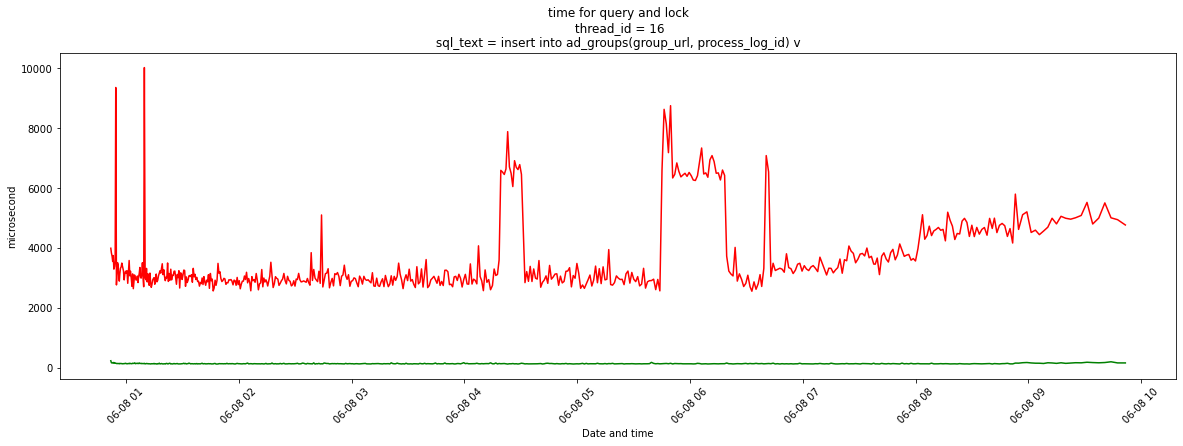

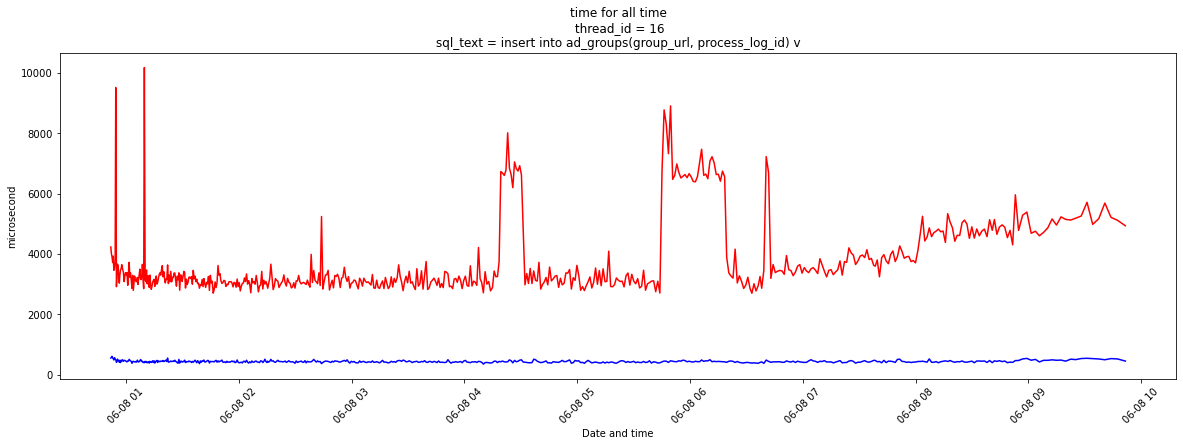

thread_id = 16 sql_text is insert into ads(source_id, card_url, ad_group_id, 


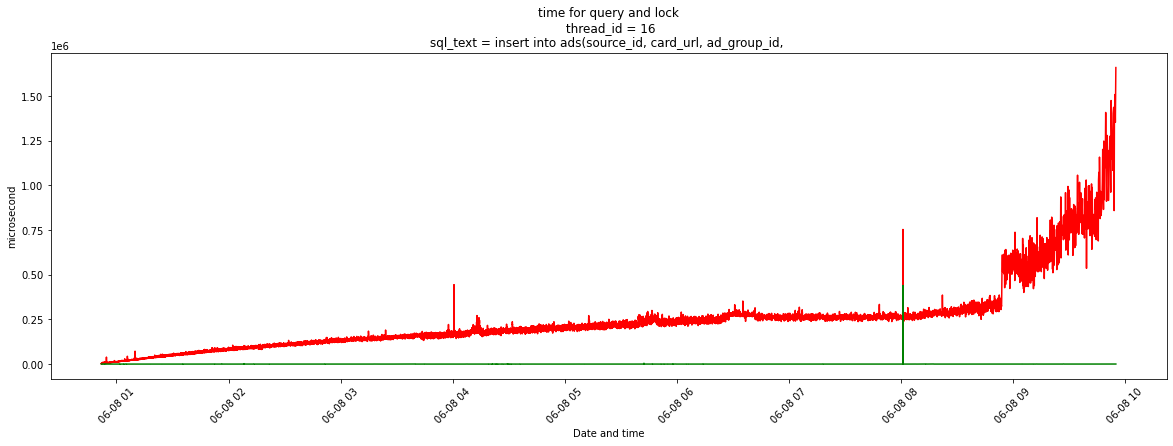

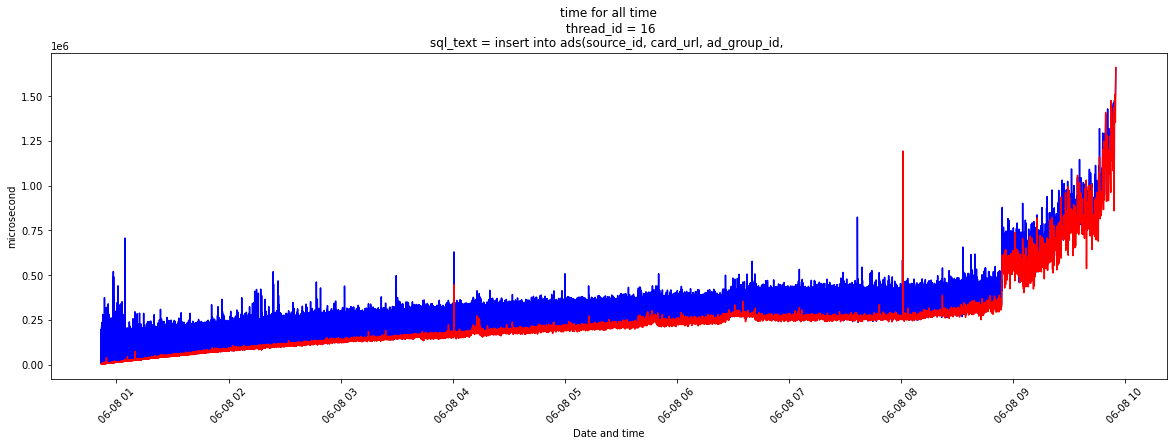

thread_id = 16 sql_text is select last_insert_id()


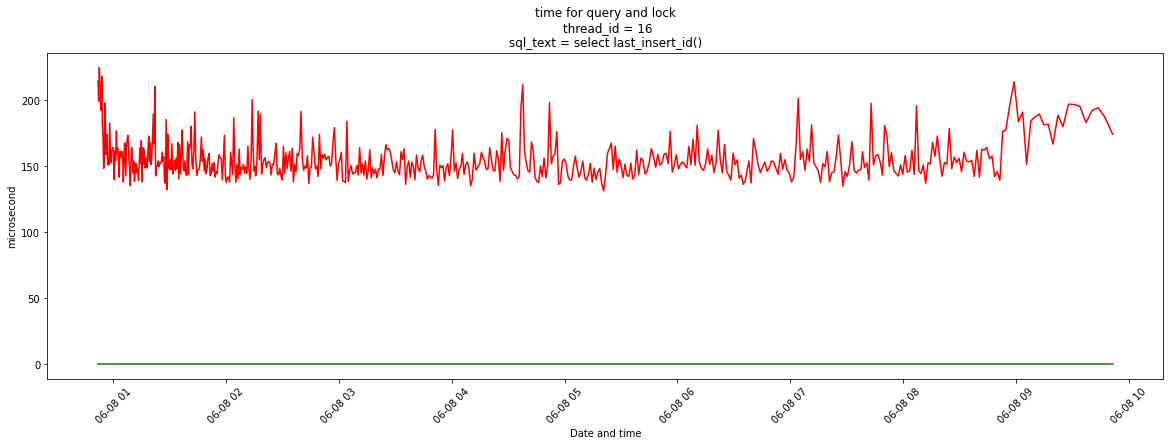

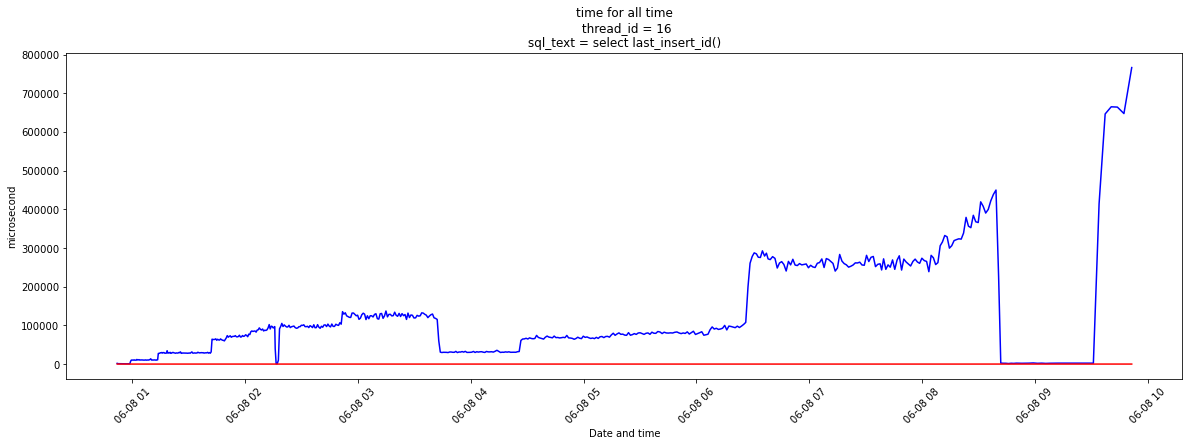

thread_id = 17 sql_text is update ads                               set ad_s


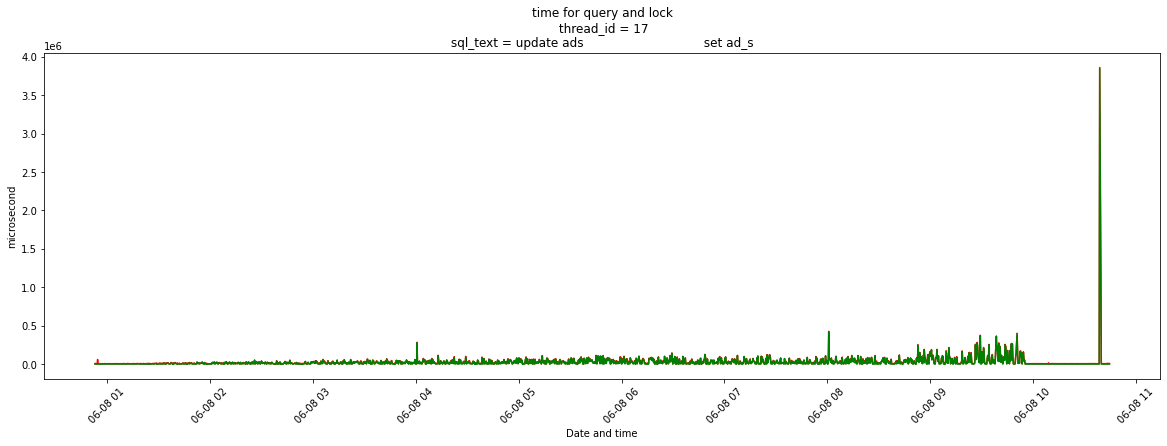

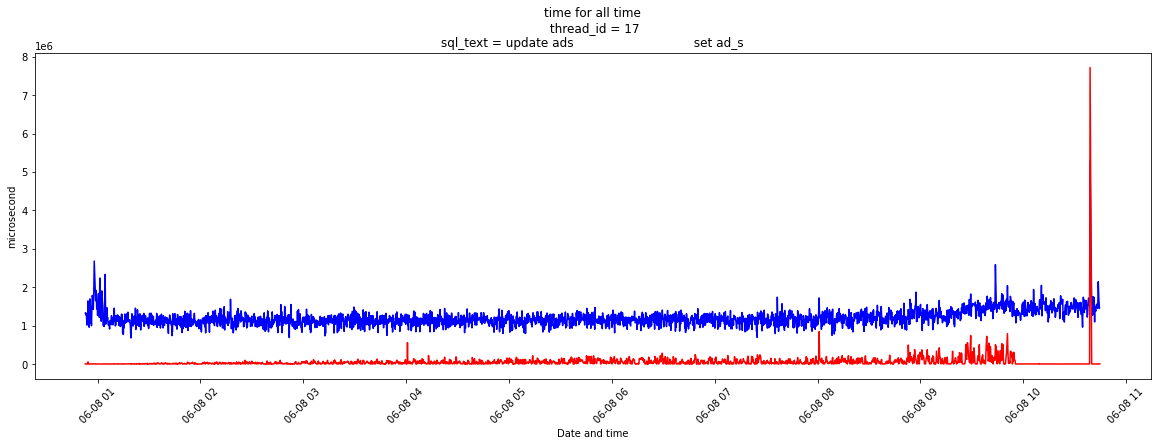

thread_id = 17 sql_text is with cte_cars_com_ad_group_ids                   


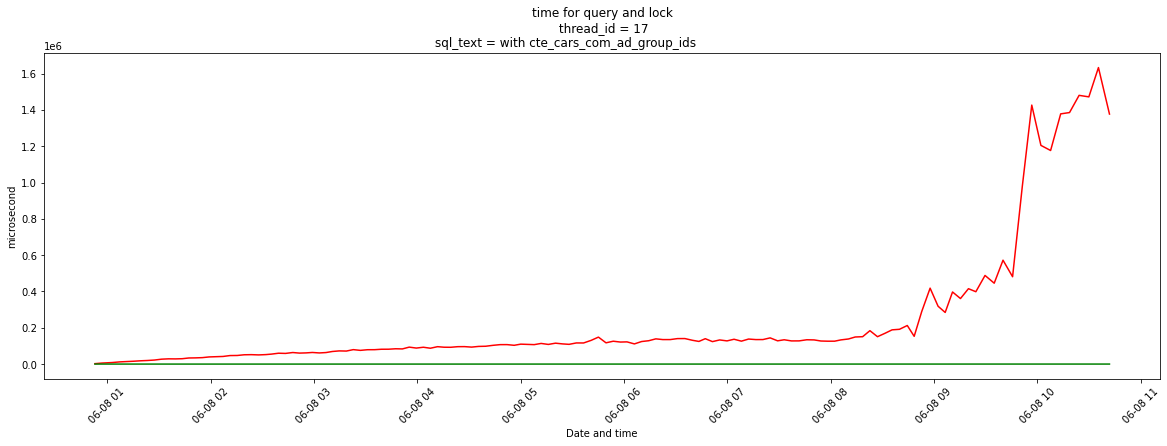

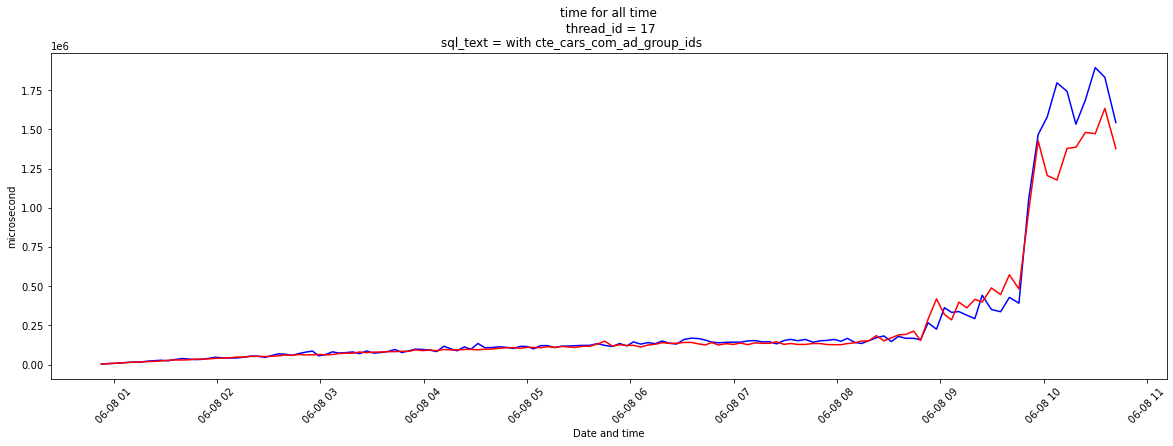

thread_id = 17 sql_text is with cte_random_group                        as 


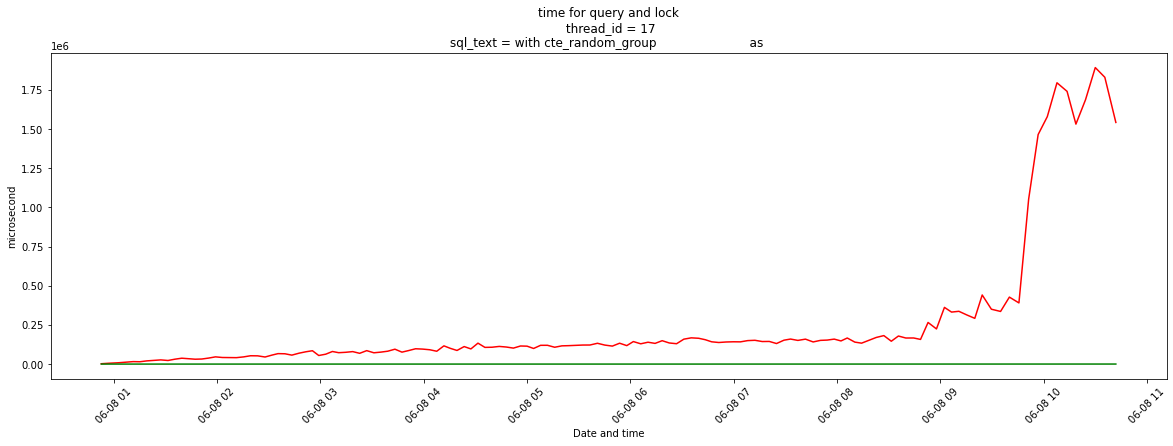

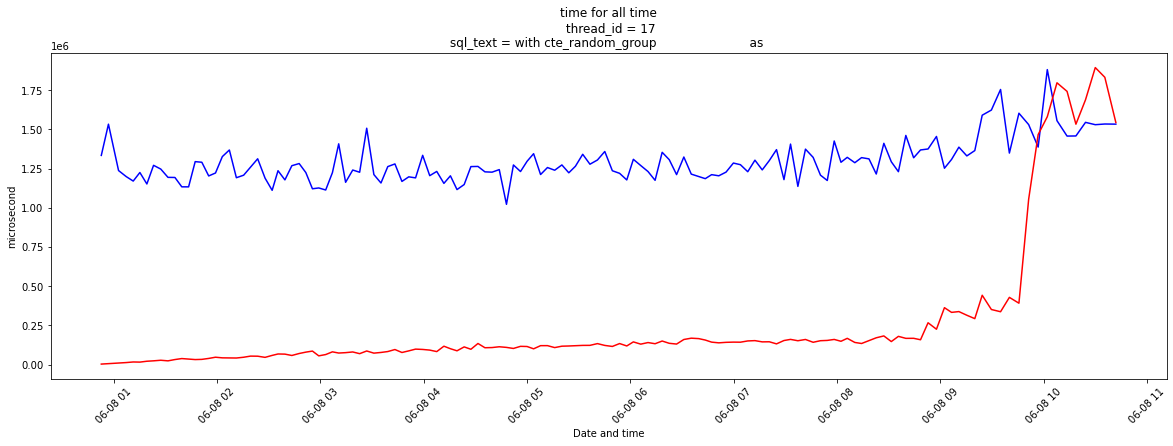

thread_id = 18 sql_text is update ads                               set ad_s


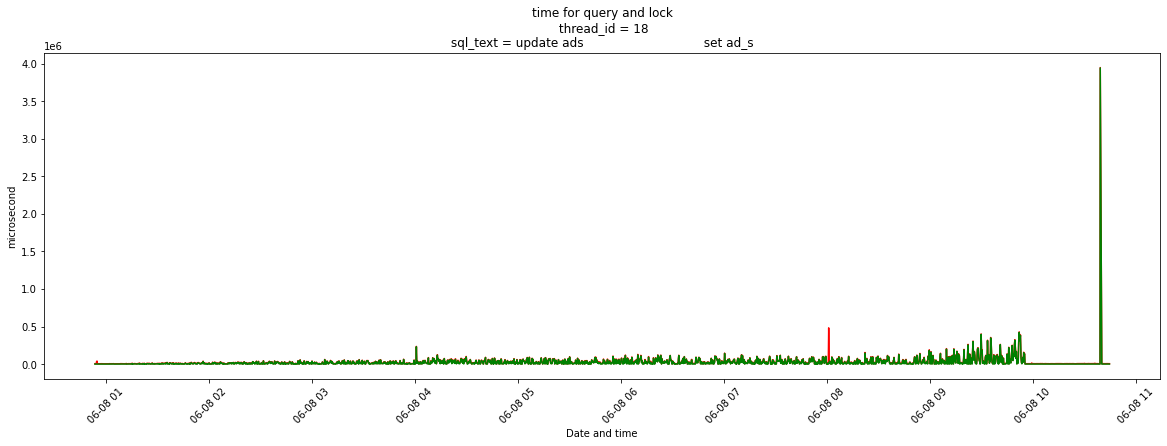

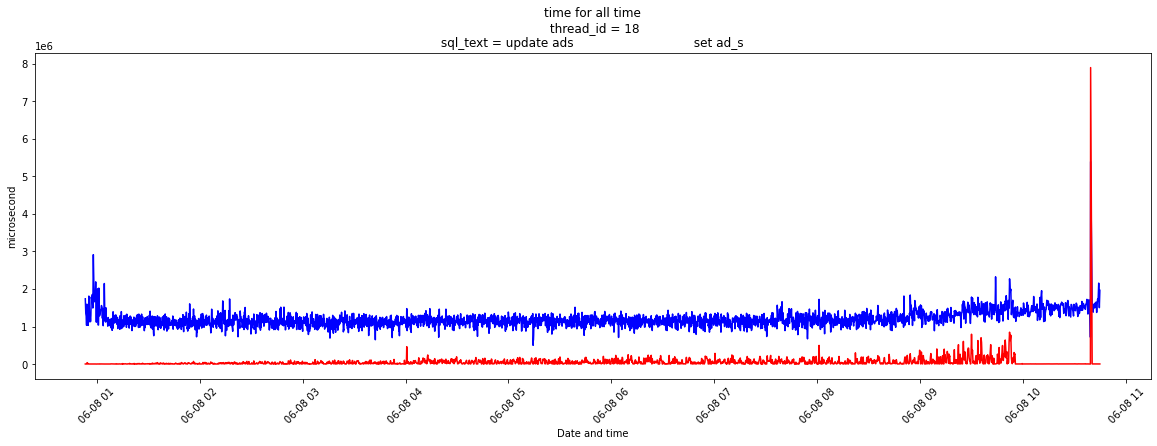

thread_id = 18 sql_text is with cte_cars_com_ad_group_ids                   


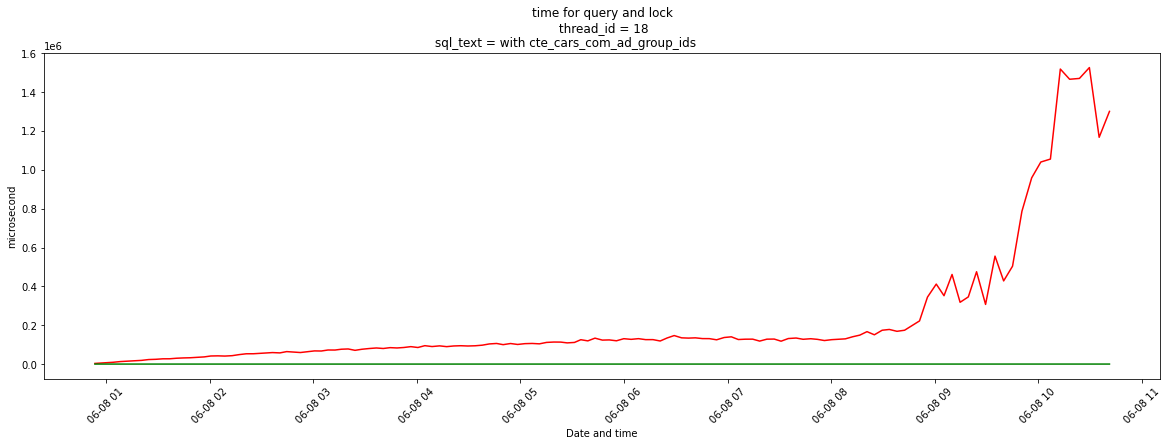

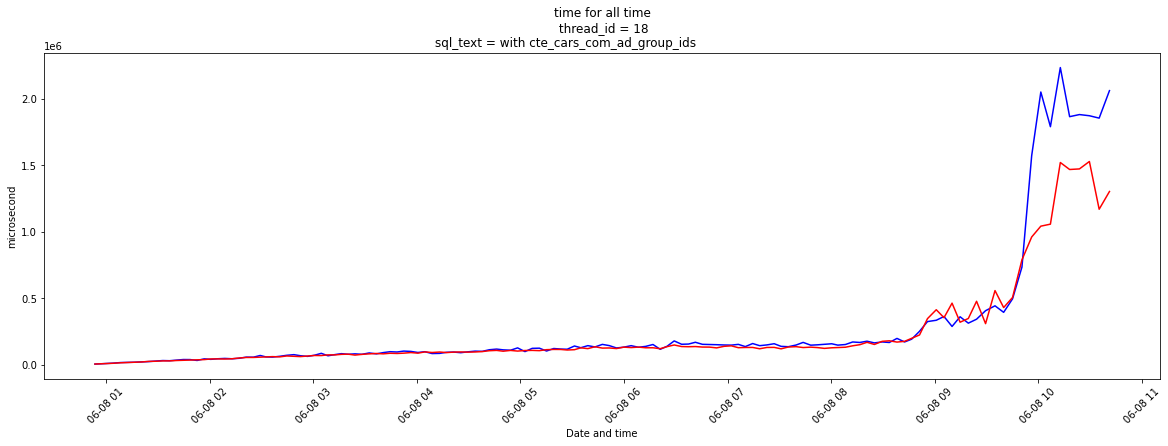

thread_id = 18 sql_text is with cte_random_group                        as 


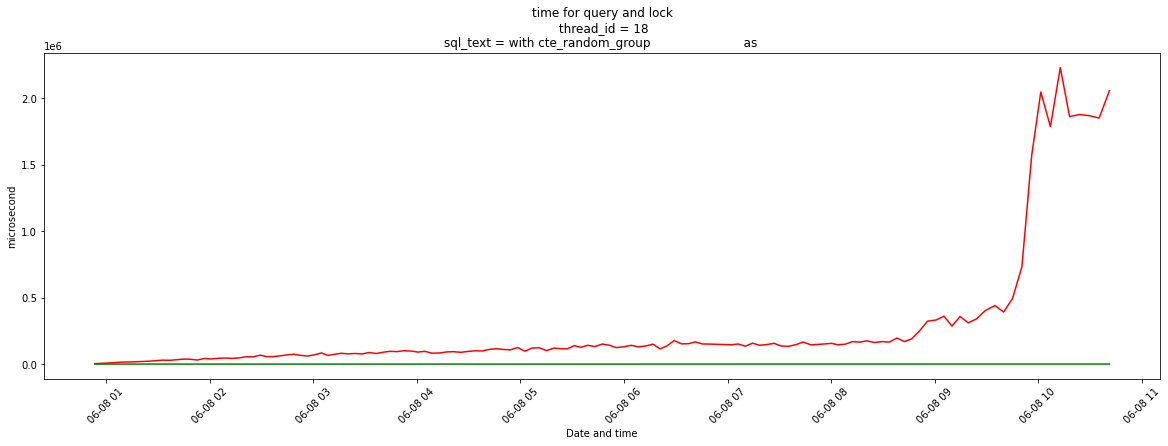

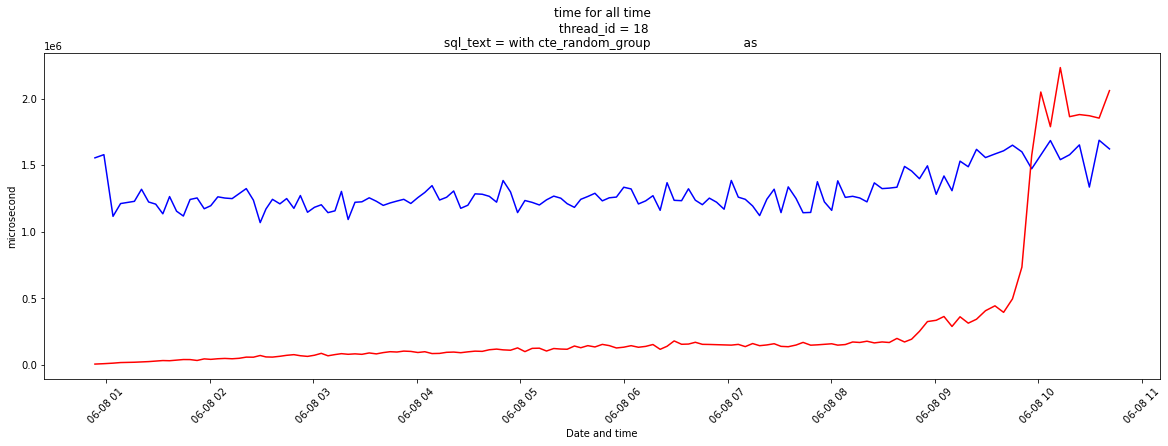

In [235]:
for row in range(len(table_thread_id)):
    thread_id = table_thread_id.loc[row, 'thread_id']
    #print(f'thread_id = {thread_id}')
    table_sql_text = summery_table[(summery_table['thread_id'] == thread_id) & (summery_table['sql_text_true_false'] == 1)][['sql_text']].groupby(by = 'sql_text').count().reset_index()
    for row_sql_text in range(len(table_sql_text)):
        sql_text = table_sql_text.loc[row_sql_text, 'sql_text']
        #print(row_sql_text)
        if len(sql_text) > 0:      
            summery_table_for_analisys = summery_table[(summery_table['sql_text'] == sql_text) & (summery_table['thread_id'] == thread_id)].reset_index()
            count_start = 0
            coun = 0
            count_end = 10
            count_final = summery_table_for_analisys.index.max()
            sql_text = sql_text.replace('\n','')
            summery_table_far_plot = pd.DataFrame(columns = ['start_time', 'all_start_time_MS_diff_avg', 'msec_query_time_avg', 'msec_lock_time_avg', 'msec_all_time_avg'])
            if len(summery_table_for_analisys) > 10:
                while count_start <=count_final:
                    table_for_calculation = summery_table_for_analisys[(summery_table_for_analisys.index >= count_start) & (summery_table_for_analisys.index < count_end)]
                    all_start_time_MS_diff_avg = table_for_calculation['all_start_time_MS_diff'].mean()
                    msec_query_time_avg = table_for_calculation['msec_query_time'].mean()
                    msec_lock_time_avg = table_for_calculation['msec_lock_time'].mean()
                    msec_all_time_avg = table_for_calculation['msec_all_time'].mean()
                    summery_table_far_plot.loc[count,'start_time'] = summery_table_for_analisys.loc[count_start,'start_time']
                    summery_table_far_plot.loc[count,'all_start_time_MS_diff_avg'] = all_start_time_MS_diff_avg
                    summery_table_far_plot.loc[count,'msec_query_time_avg'] = msec_query_time_avg
                    summery_table_far_plot.loc[count,'msec_lock_time_avg'] = msec_lock_time_avg
                    summery_table_far_plot.loc[count,'msec_all_time_avg'] = msec_all_time_avg
                    count_start += 10
                    count_end +=10
                    count += 1
             
                print(f'thread_id = {thread_id} sql_text is {sql_text}')
                
                if len(summery_table_far_plot) > 20:

                    fig, ax = plt.subplots()
                    ax.plot(summery_table_far_plot['start_time'], summery_table_far_plot['msec_query_time_avg'], color = 'red')
                    ax.plot(summery_table_far_plot['start_time'], summery_table_far_plot['msec_lock_time_avg'], color = 'green')
                    fig.set_figwidth(20)    #  ширина и
                    fig.set_figheight(6)    #  высота "Figure"
                    plt.xticks(rotation=45)
                    plt.xlabel('Date and time')
                    plt.ylabel('microsecond')
                    plt.title(f'time for query and lock\n thread_id = {thread_id}\n sql_text = {sql_text} ')
                    plt.show()
                    
                    fig, ax = plt.subplots()
                    ax.plot(summery_table_far_plot['start_time'], summery_table_far_plot['all_start_time_MS_diff_avg'], color = 'blue')
                    ax.plot(summery_table_far_plot['start_time'], summery_table_far_plot['msec_all_time_avg'], color = 'red')
                    fig.set_figwidth(20)    #  ширина и
                    fig.set_figheight(6)    #  высота "Figure"
                    plt.xticks(rotation=45)
                    plt.xlabel('Date and time')
                    plt.ylabel('microsecond')
                    plt.title(f'time for all time\n thread_id = {thread_id}\n sql_text = {sql_text} ')
                    plt.show()
            
            
            
            

# Выводы

### thread_id = 16
   - _insert into ad_groups(group_url, process_log_id) v_
      - Стоит оратить на то, что в конце наблюдаемого периода начало расти время выполнения вставки
      
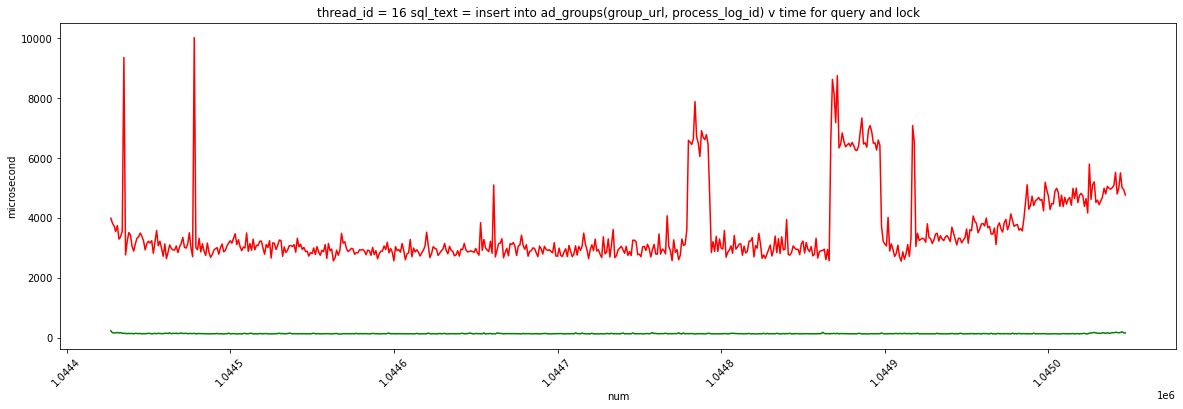
      
   - _insert into ads(source_id, card_url, ad_group_id_
      - Стоит обратить внимение на возрастание времени выполнения вставики. Можно предположить логарифмическую функцию возрастания времени, что приведет к значительному увеличиению работы при увеличении объемов таблицыю Это требует разработки шагов по оптимизации операции вставки в таблицу  ads.
      
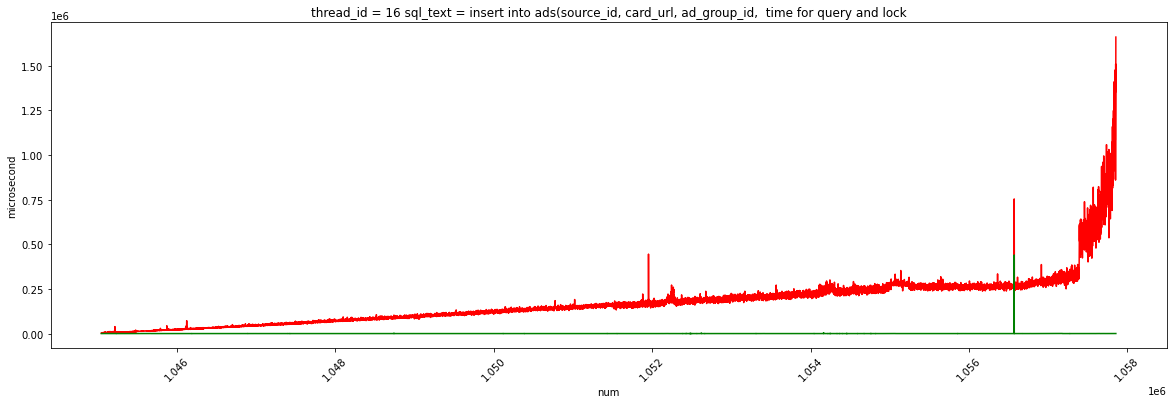
      
### thread_id = 17
   - _update ads\n set ad_s_
      - В конце наблюдаемого периода наблюдается незначительное увеличение времени выполнения обновления. Стоит обратить внимение на увеличение времени в конце наблюдаемого периода. Это может в будущем повлиять на время обновления в будущем и стоит уже сейча найти способы повышения производительности операции обновления. 
      
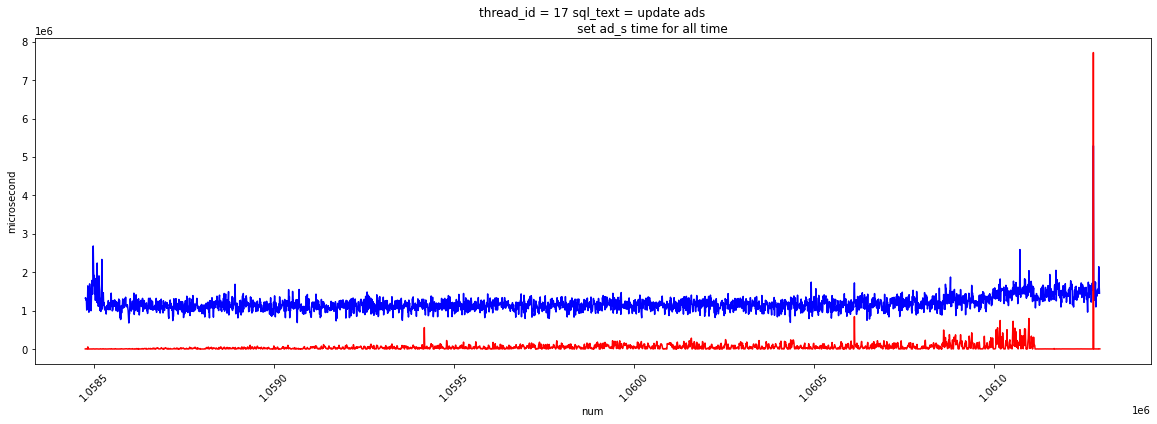
      
   - _with cte_cars_com_ad_group_ids\n
      - Значительно вырасло время выполнения запроса, при том темп роста очень большой. 
      
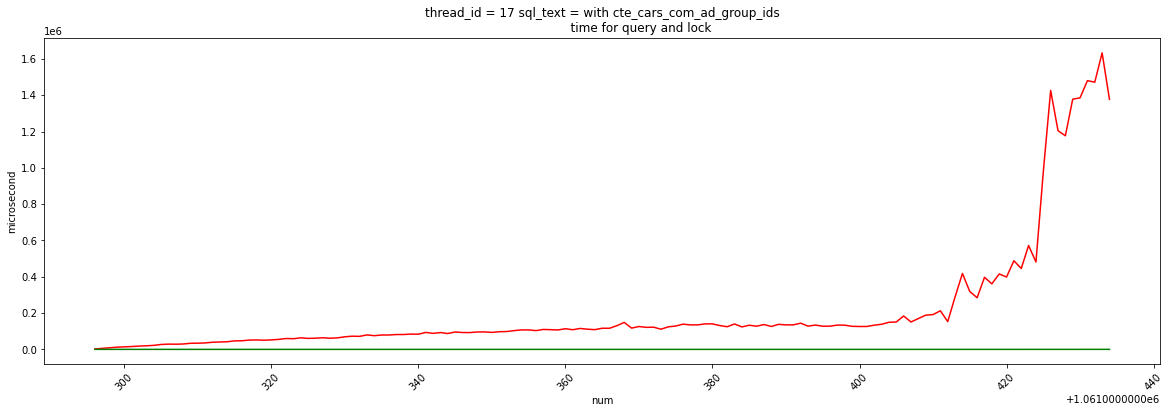
      
   - _with cte_random_group\n as\n_ 
      - Значительно выросло время выполнения запроса.
      
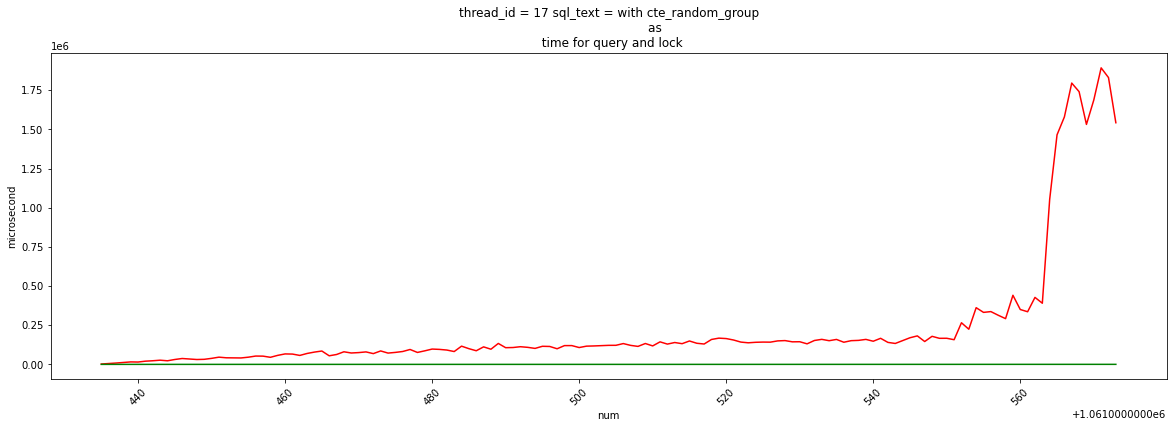
      
      
### thread_id = 18
   - _update ads\n set ad_s_
      -  В конце наблюдаемого периода наблюдается незначительное увеличение времени выполнения обновления. Стоит обратить внимение на увеличение времени в конце наблюдаемого периода. Это может в будущем повлиять на время обновления в будущем и стоит уже сейча найти способы повышения производительности операции обновления. 
      
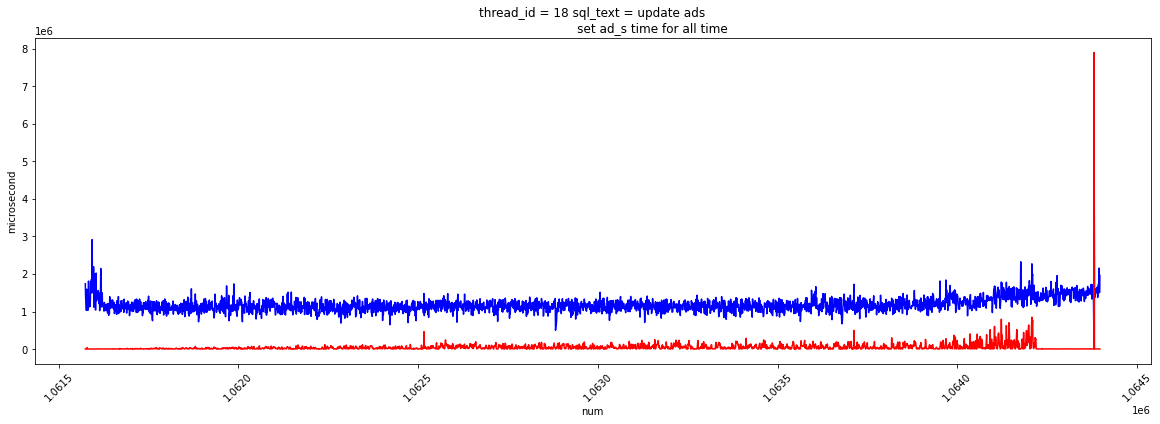
      
   - _with cte_cars_com_ad_group_ids\n_
     - Значительно вырасло время выполнения запроса, при том темп роста очень большой. 
     
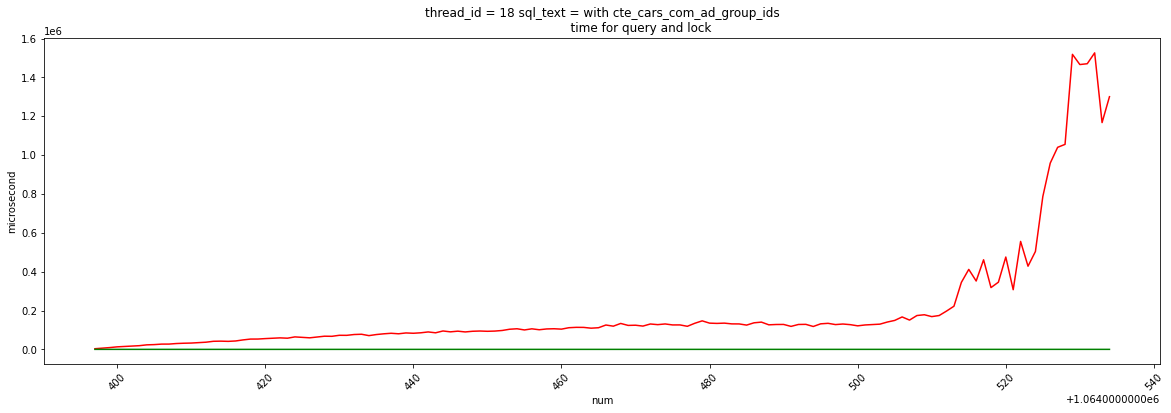
     
   - _with cte_random_group\n as\n_
     - Значительно вырасло время выполнения запроса, при том темп роста очень большой. 
     
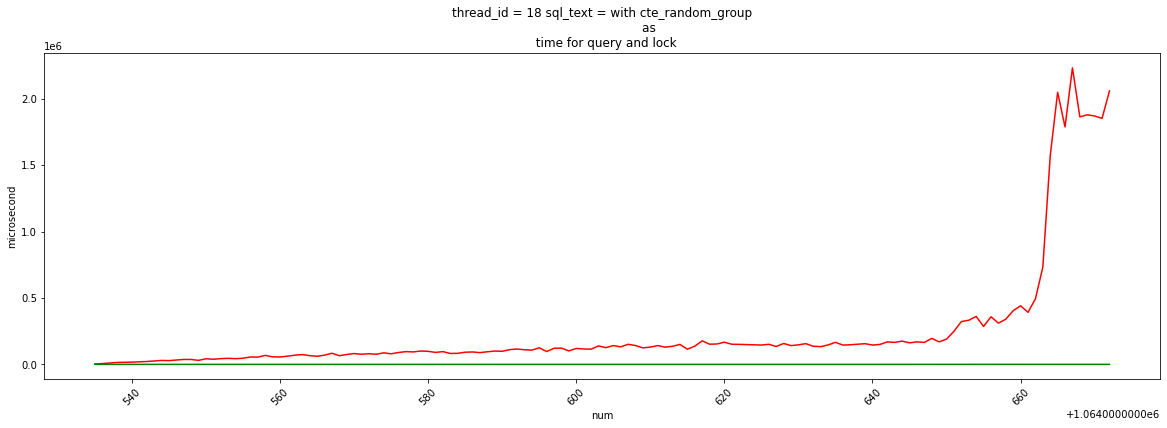

# Проанализируем более детально как менялось время загрузки за последние 2 часа, для этого посчитаем скользящую среднюю за 100 итераций.

In [152]:
summery_table_last_time = summery_table[summery_table['start_time'] >= '2023-06-08 08:44:38.736093']

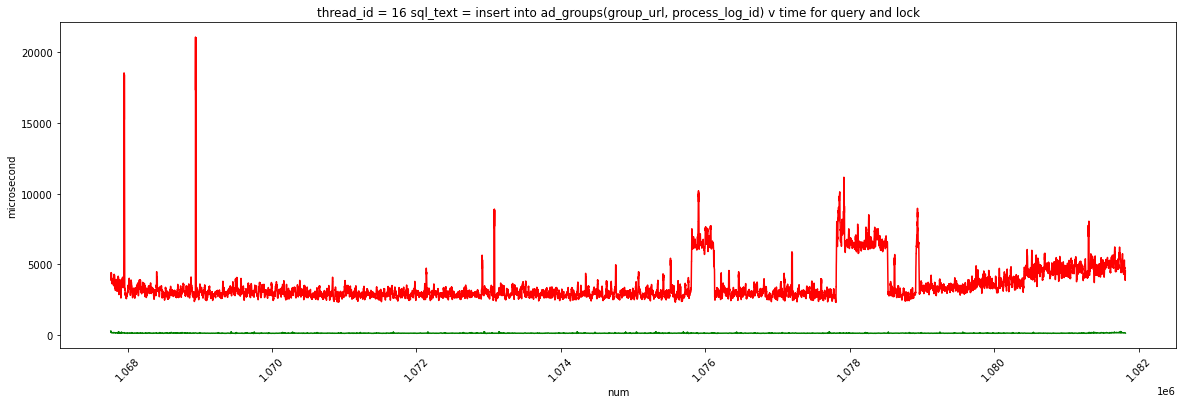

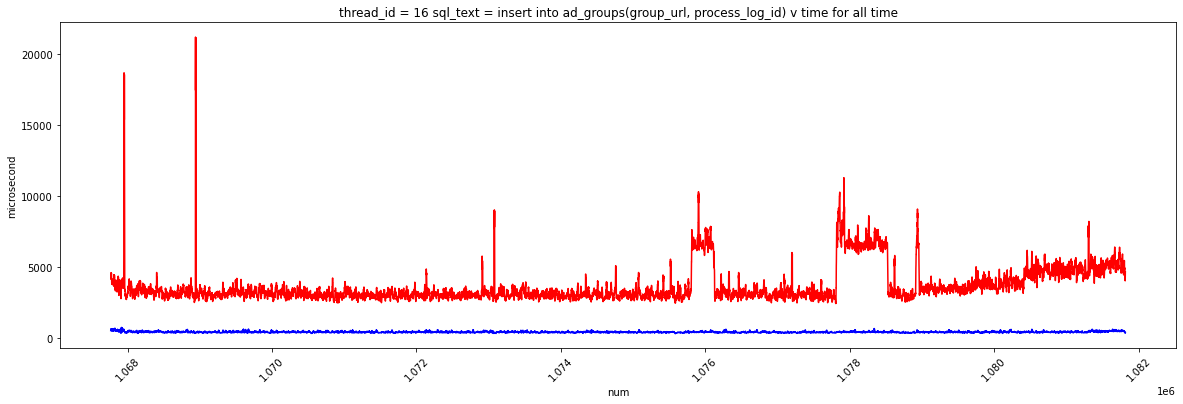

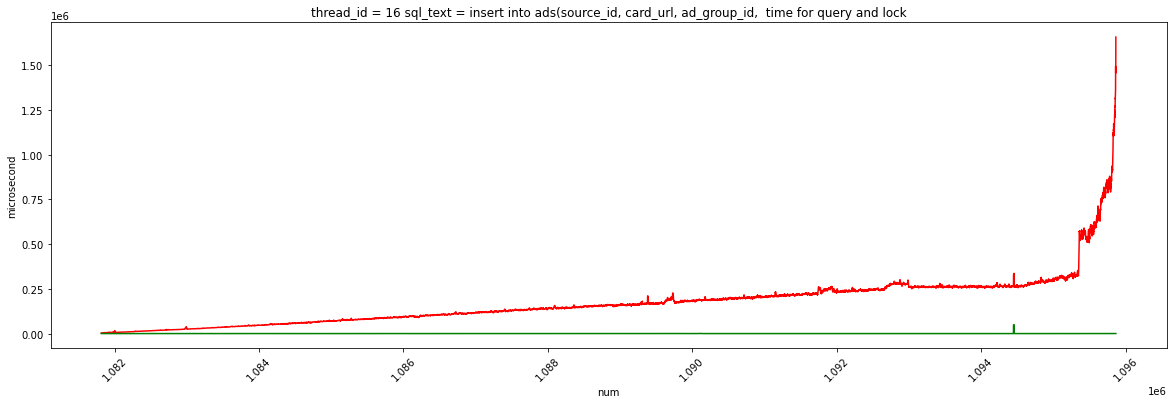

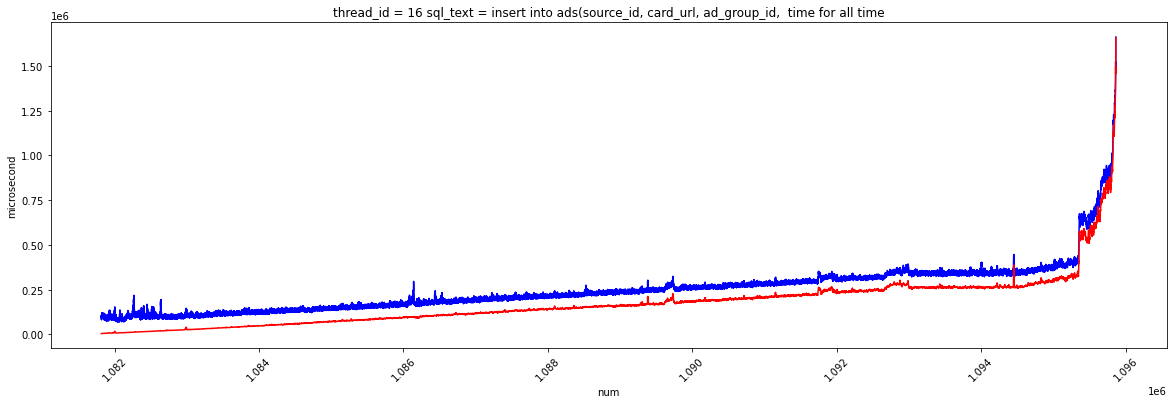

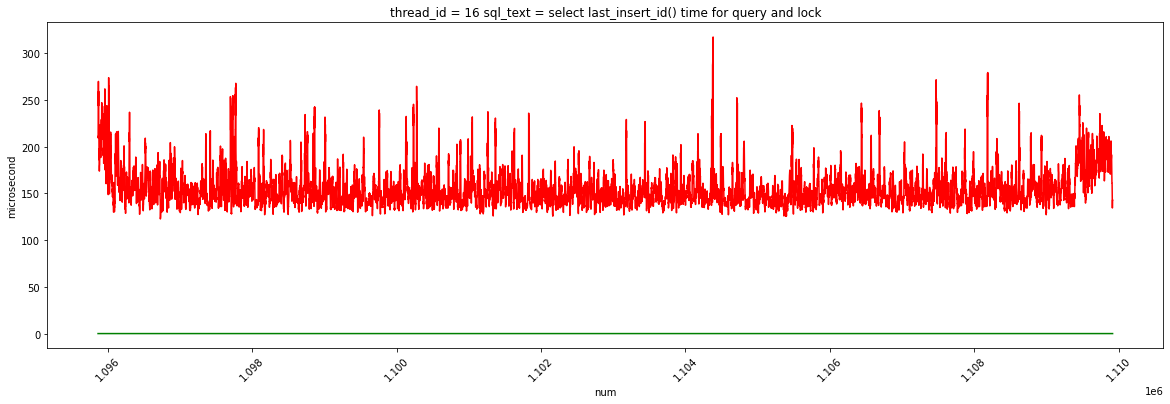

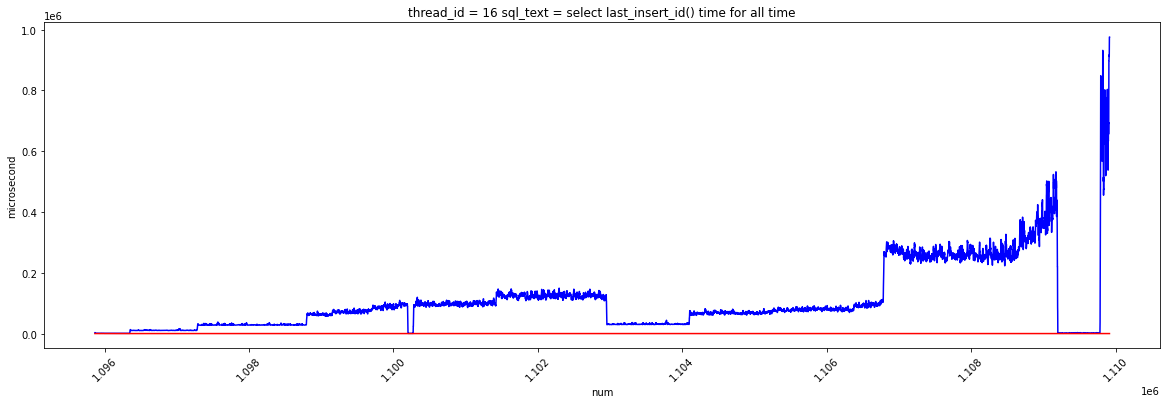

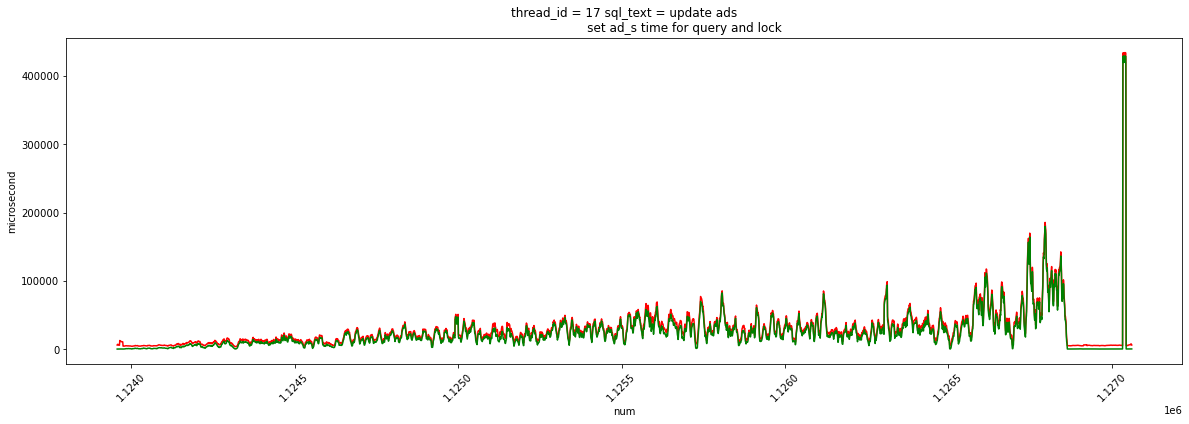

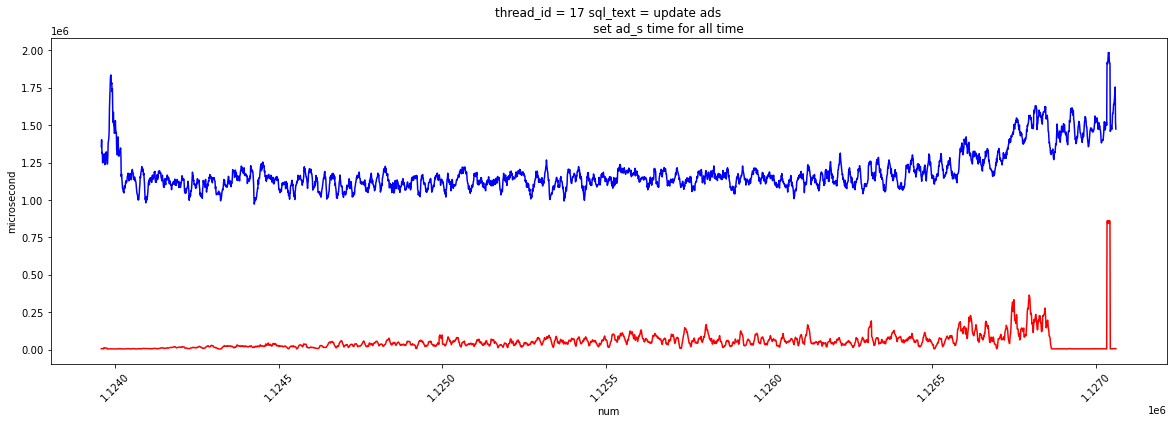

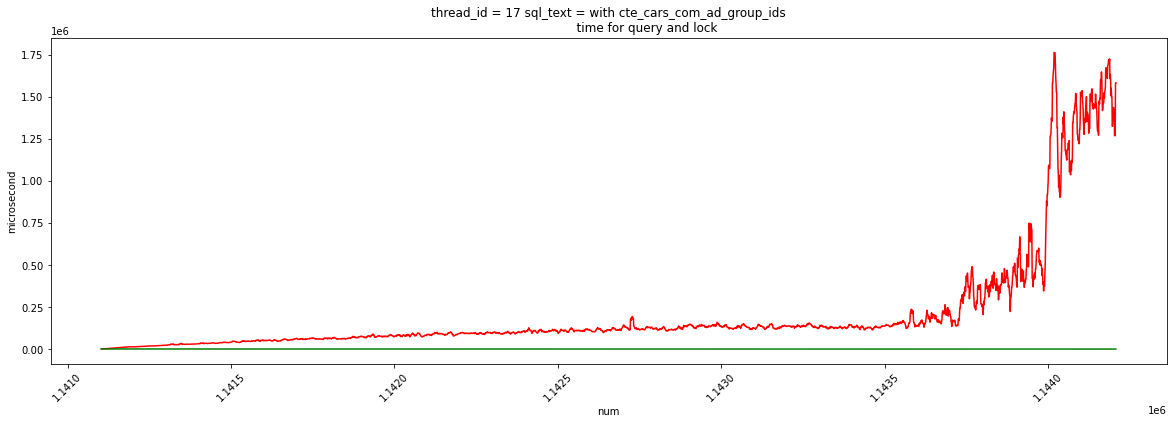

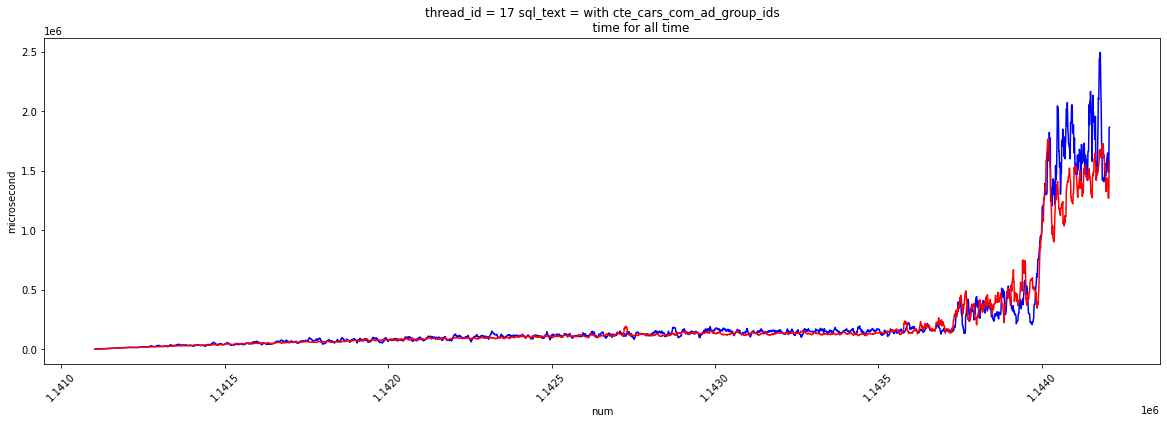

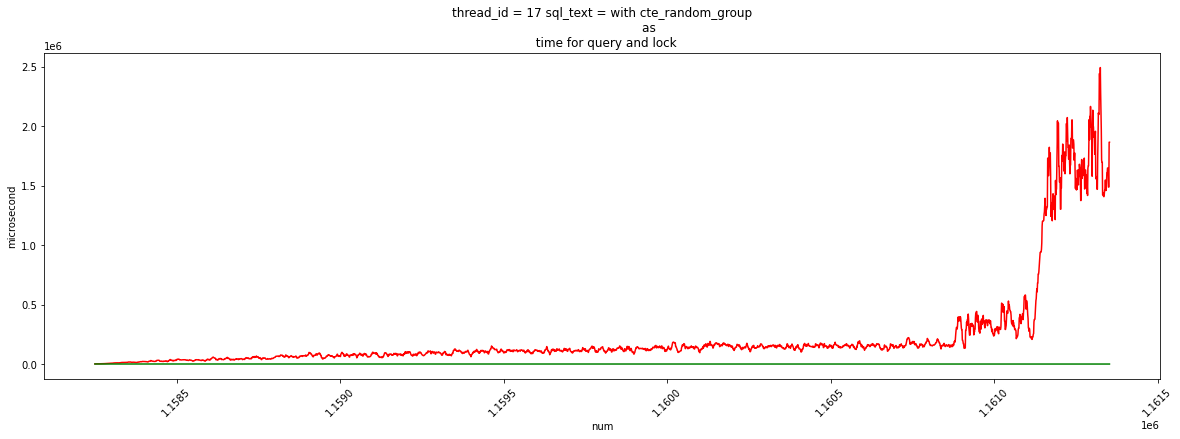

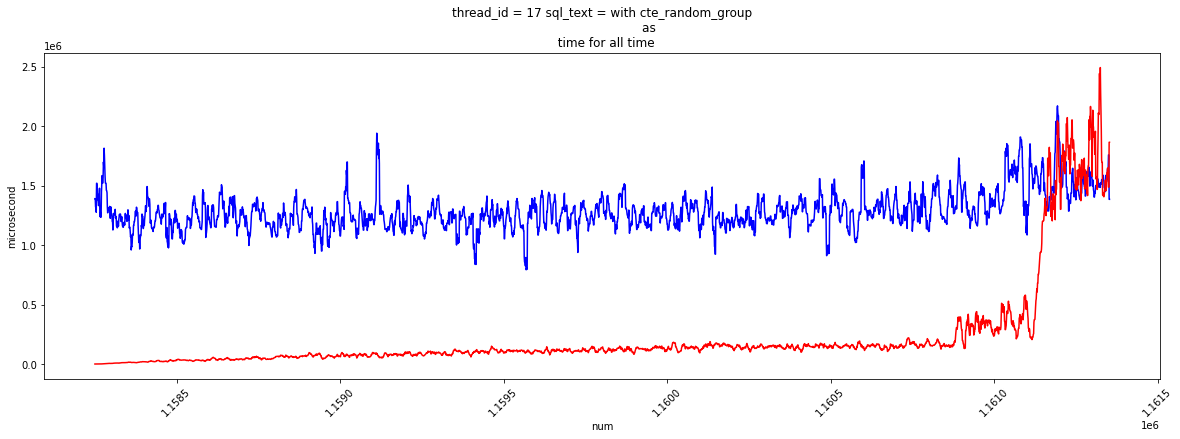

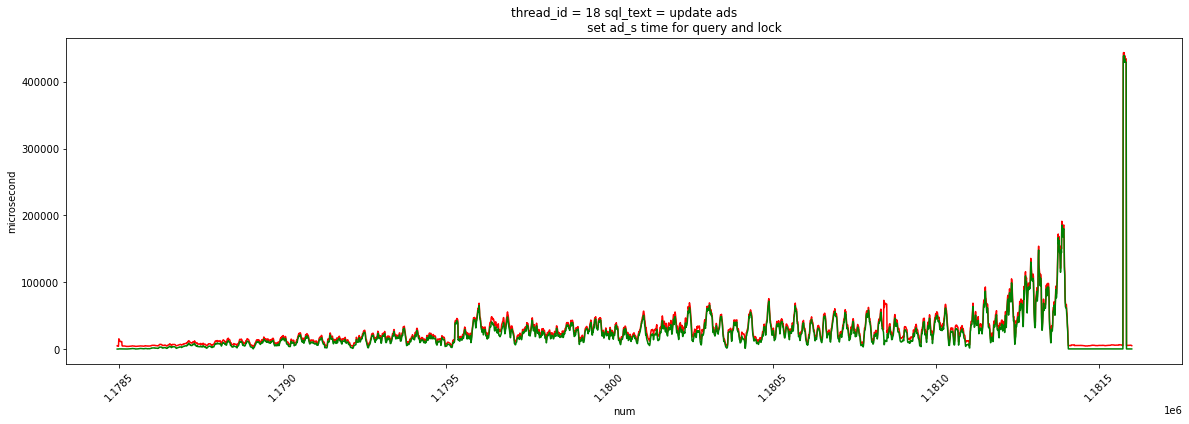

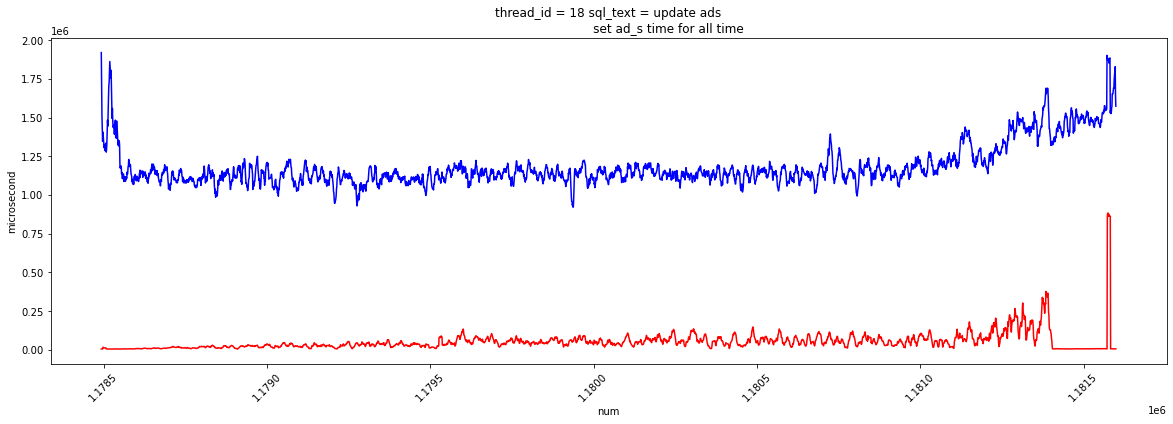

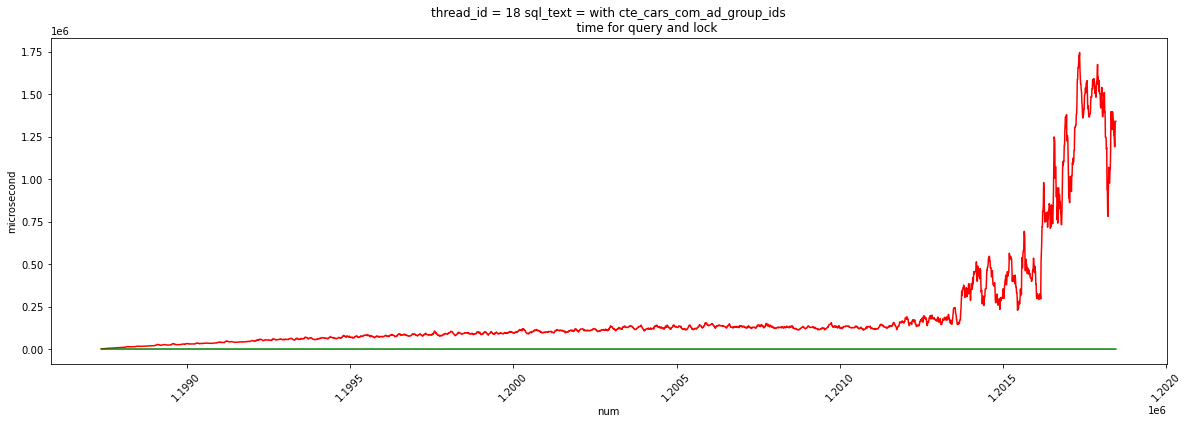

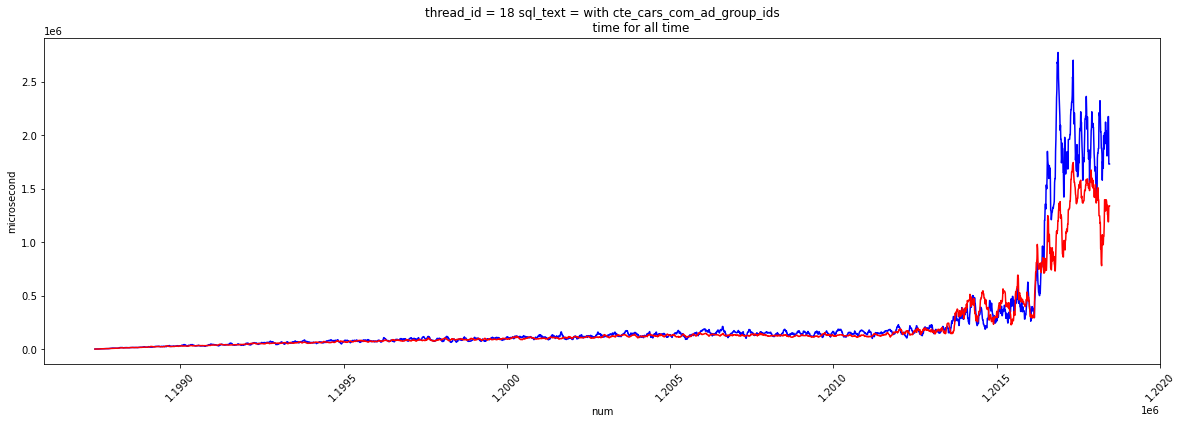

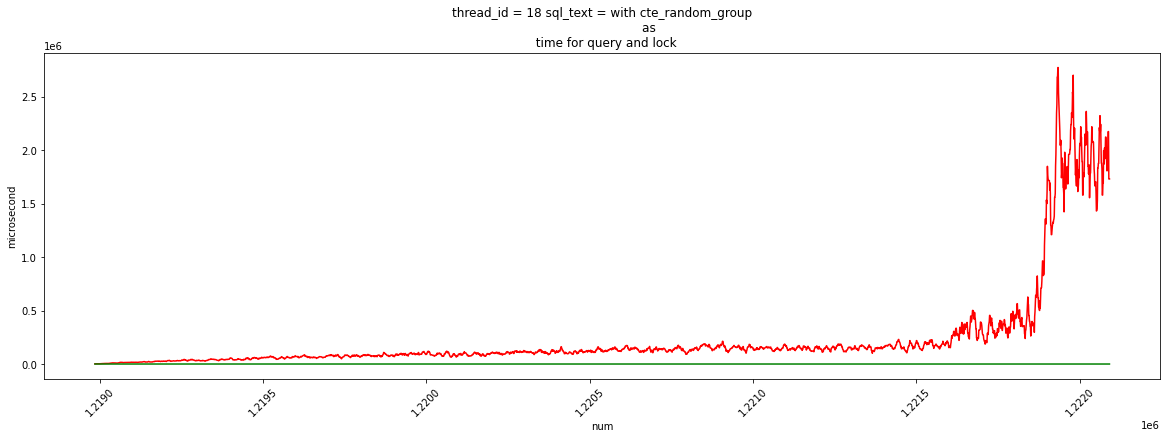

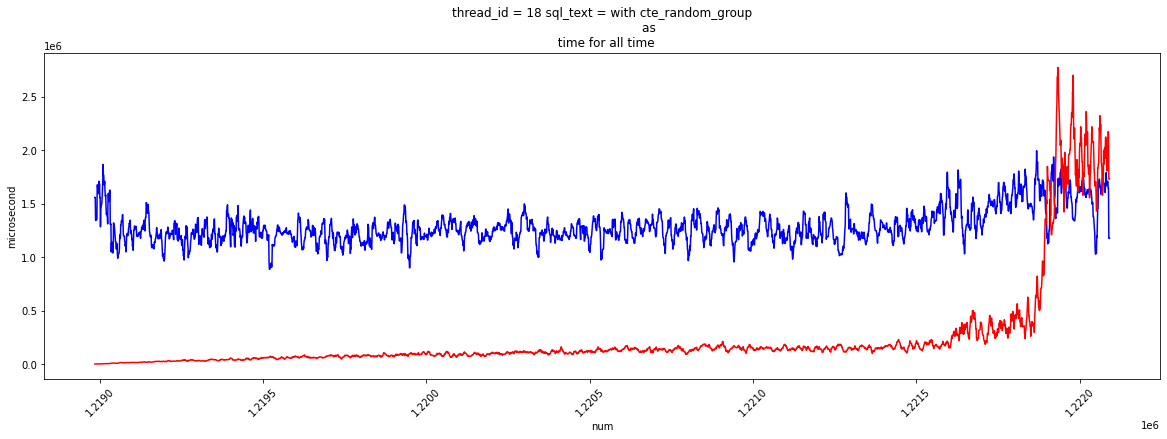

In [154]:
for row in range(len(table_thread_id)):
    thread_id = table_thread_id.loc[row, 'thread_id']
    #print(f'thread_id = {thread_id}')
    table_sql_text = summery_table_last_time[(summery_table_last_time['thread_id'] == thread_id) & (summery_table_last_time['sql_text_true_false'] == 1)][['sql_text']].groupby(by = 'sql_text').count().reset_index()
    for row_sql_text in range(len(table_sql_text)):
        sql_text = table_sql_text.loc[row_sql_text, 'sql_text']
        #print(row_sql_text)
        if len(sql_text) > 0:      
            summery_table_for_analisys = summery_table[(summery_table['sql_text'] == sql_text) & (summery_table['thread_id'] == thread_id)]
            count_start = 0
            coun = 0
            count_end = 100
            count_final = summery_table_for_analisys.index.max()
            summery_table_far_plot = pd.DataFrame(columns = ['num', 'all_start_time_MS_diff_avg', 'msec_query_time_avg', 'msec_lock_time_avg', 'msec_all_time_avg'])
            if len(summery_table_for_analisys) > 100:
                while count_start <=count_final:
                    table_for_calculation = summery_table_for_analisys[(summery_table_for_analisys.index >= count_start) & (summery_table_for_analisys.index < count_end)]
                    all_start_time_MS_diff_avg = table_for_calculation['all_start_time_MS_diff'].mean()
                    msec_query_time_avg = table_for_calculation['msec_query_time'].mean()
                    msec_lock_time_avg = table_for_calculation['msec_lock_time'].mean()
                    msec_all_time_avg = table_for_calculation['msec_all_time'].mean()
                    summery_table_far_plot.loc[count,'num'] = count
                    summery_table_far_plot.loc[count,'all_start_time_MS_diff_avg'] = all_start_time_MS_diff_avg
                    summery_table_far_plot.loc[count,'msec_query_time_avg'] = msec_query_time_avg
                    summery_table_far_plot.loc[count,'msec_lock_time_avg'] = msec_lock_time_avg
                    summery_table_far_plot.loc[count,'msec_all_time_avg'] = msec_all_time_avg
                    count_start += 10
                    count_end +=10
                    count += 1
             
                
                if len(summery_table_far_plot) > 20:

                    fig, ax = plt.subplots()
                    ax.plot(summery_table_far_plot['num'], summery_table_far_plot['msec_query_time_avg'], color = 'red')
                    ax.plot(summery_table_far_plot['num'], summery_table_far_plot['msec_lock_time_avg'], color = 'green')
                    fig.set_figwidth(20)    #  ширина и
                    fig.set_figheight(6)    #  высота "Figure"
                    plt.xticks(rotation=45)
                    plt.xlabel('num')
                    plt.ylabel('microsecond')
                    plt.title(f'thread_id = {thread_id} sql_text = {sql_text} time for query and lock')
                    plt.show()
                    
                    fig, ax = plt.subplots()
                    ax.plot(summery_table_far_plot['num'], summery_table_far_plot['all_start_time_MS_diff_avg'], color = 'blue')
                    ax.plot(summery_table_far_plot['num'], summery_table_far_plot['msec_all_time_avg'], color = 'red')
                    fig.set_figwidth(20)    #  ширина и
                    fig.set_figheight(6)    #  высота "Figure"
                    plt.xticks(rotation=45)
                    plt.xlabel('num')
                    plt.ylabel('microsecond')
                    plt.title(f'thread_id = {thread_id} sql_text = {sql_text} time for all time')
                    plt.show()
            
            

# Выводы
Результаты поворили предыдущие


# Анализ логов с худшими аппаратными решениями 

In [241]:
table_thread_id = summery_table_2[['thread_id']].groupby(by='thread_id').count().reset_index()

thread_id = 76 sql_text is insert into ad_groups(group_url, process_log_id) v


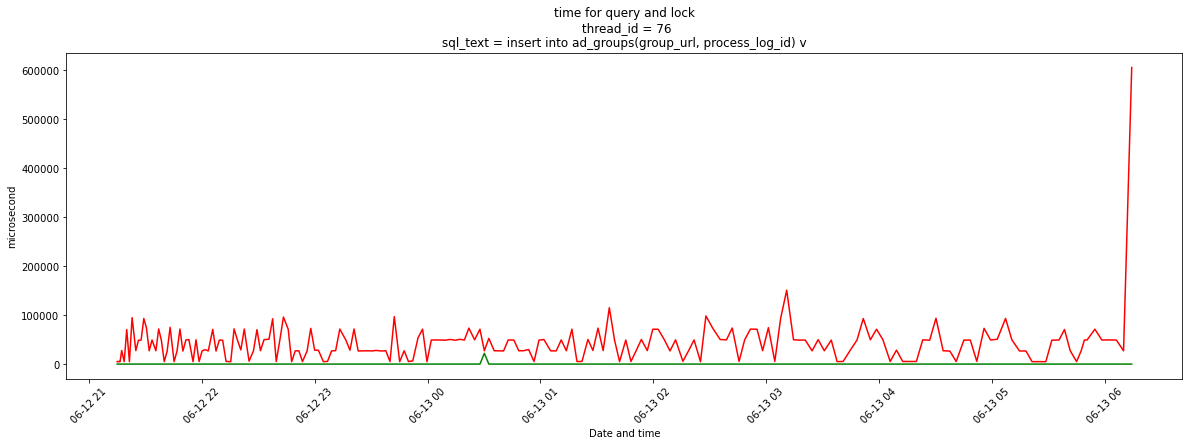

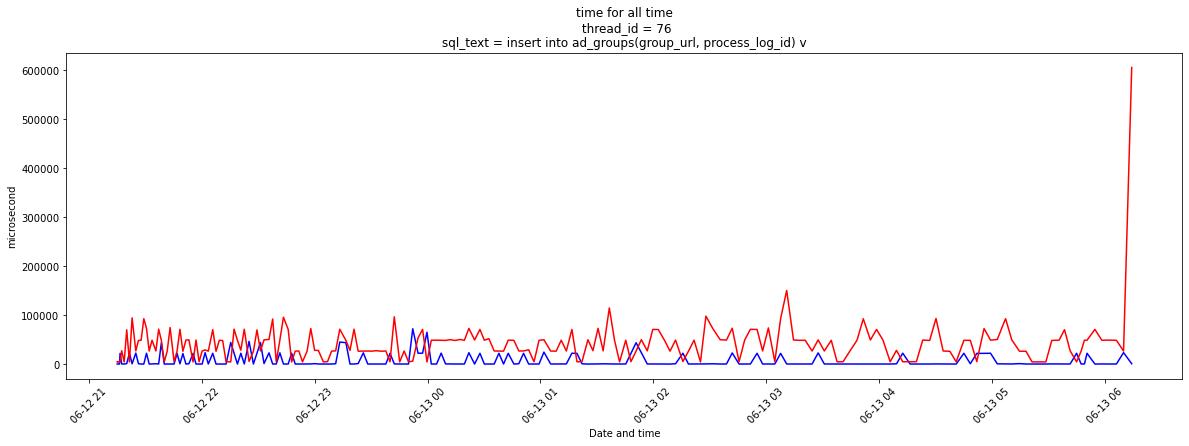

thread_id = 76 sql_text is insert into ads(source_id, card_url, ad_group_id, 


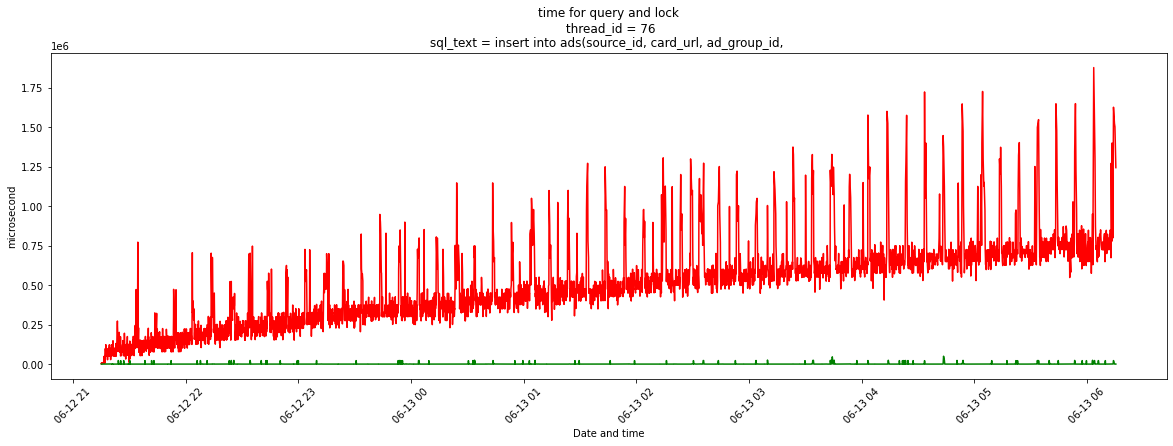

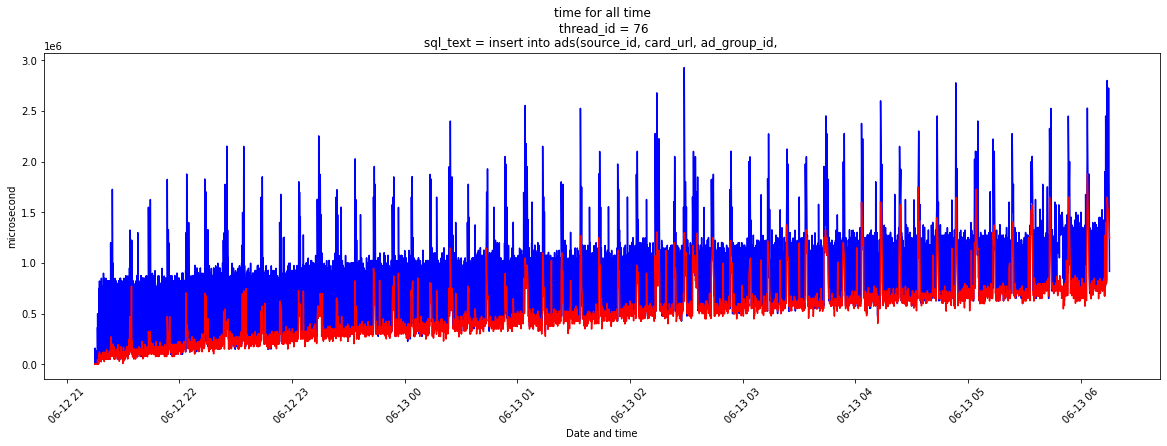

thread_id = 76 sql_text is select last_insert_id() as ad_group_id


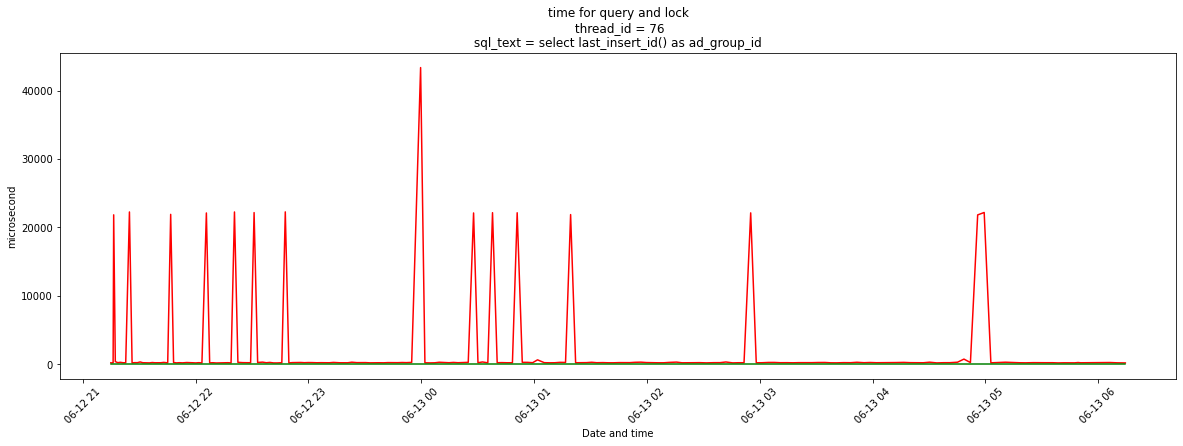

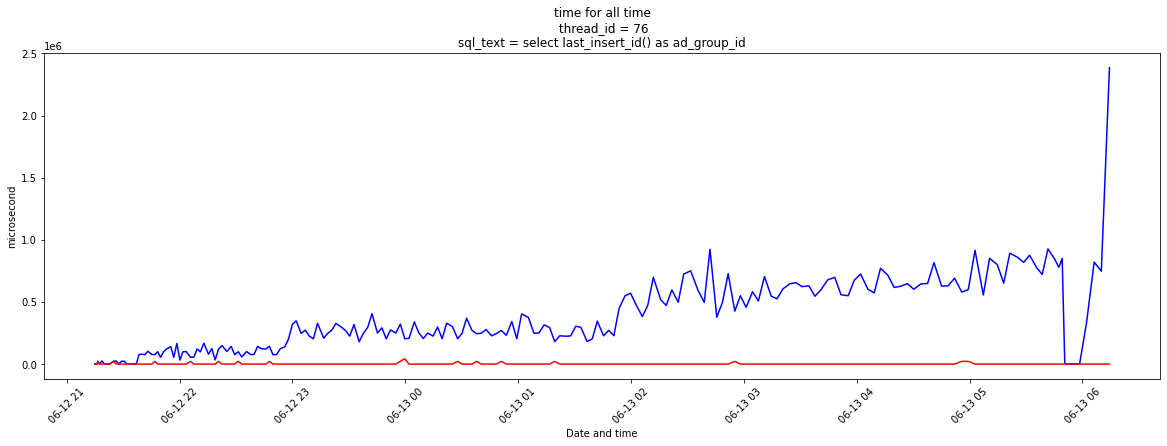

thread_id = 81 sql_text is update ads                               set ad_s


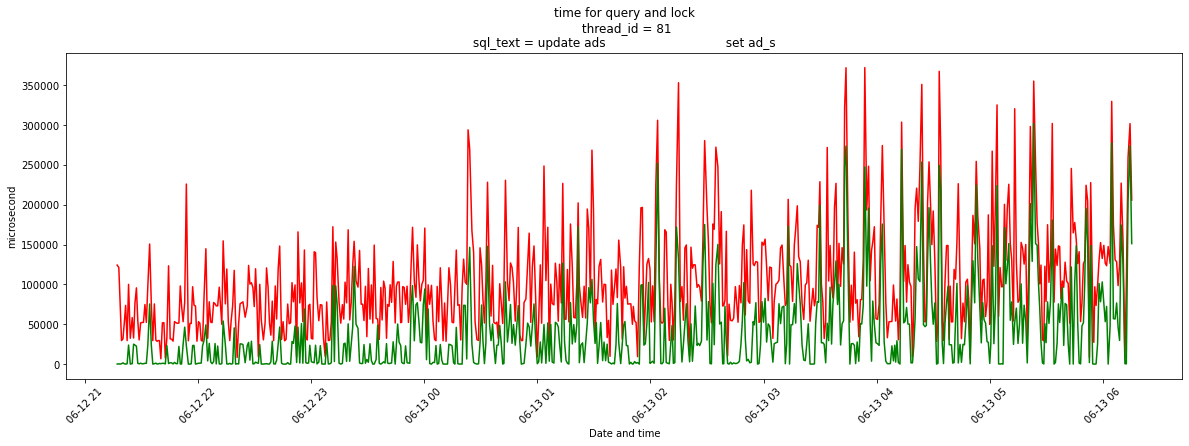

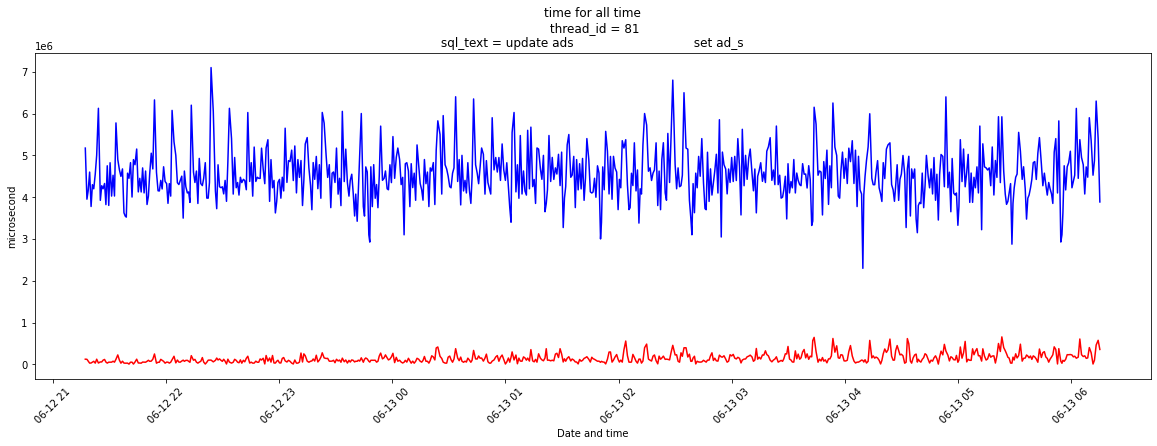

thread_id = 81 sql_text is with cte_cars_com_ad_group_ids                   


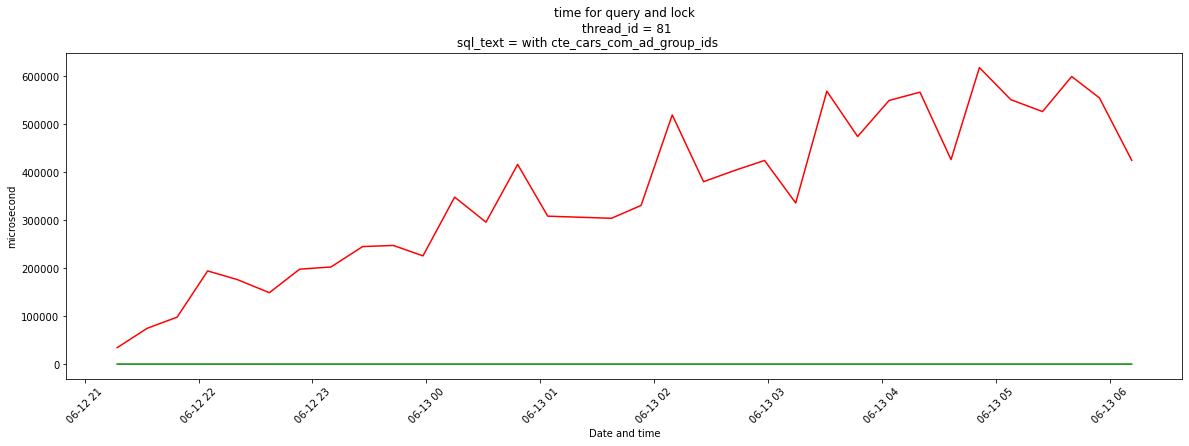

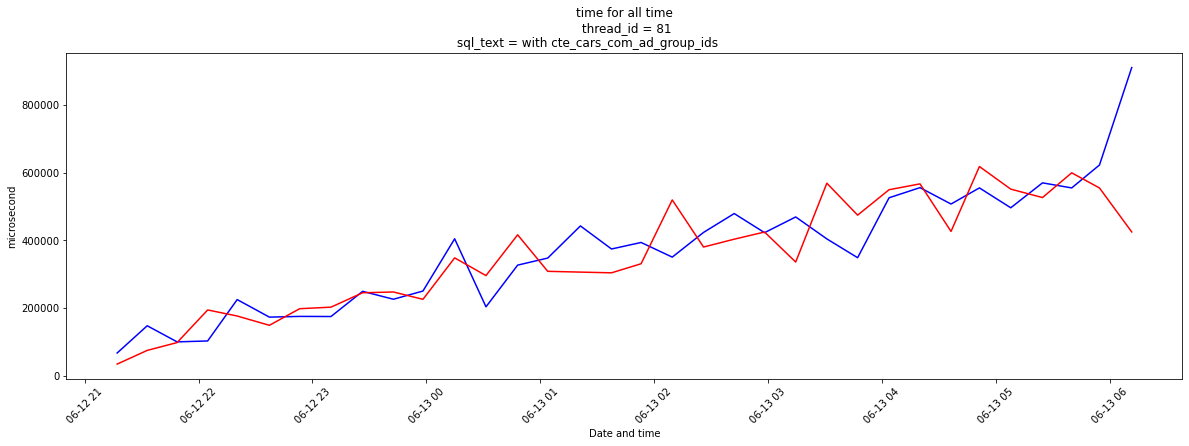

thread_id = 81 sql_text is with cte_random_group                        as 


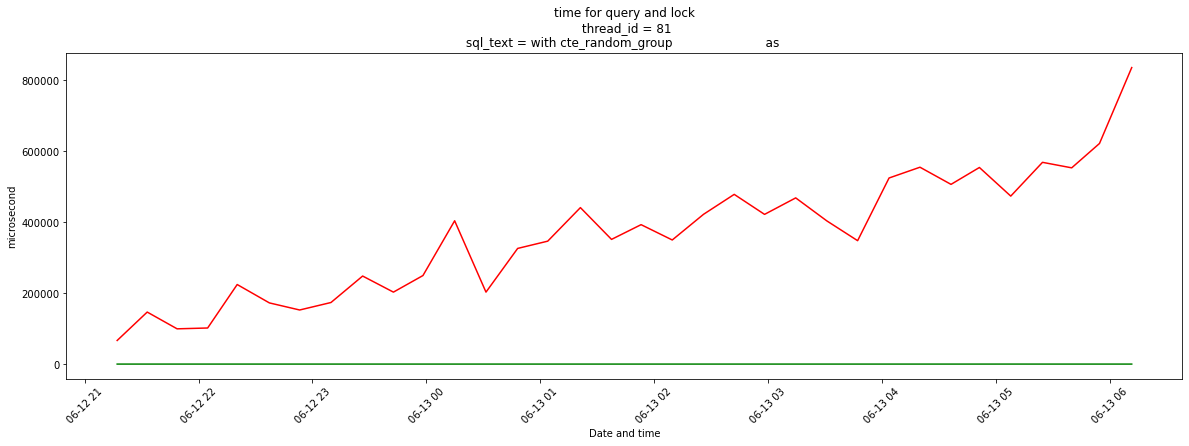

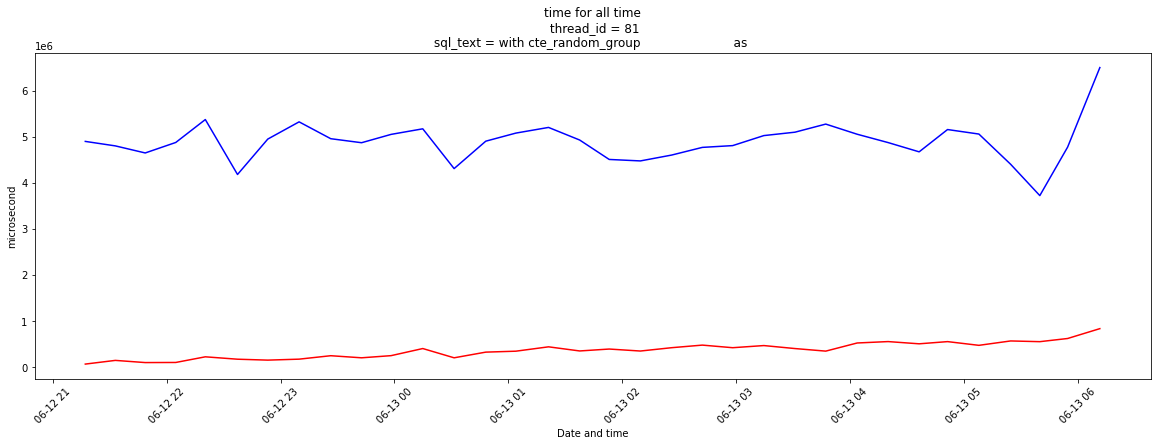

In [272]:
for row in range(len(table_thread_id)):
    thread_id = table_thread_id.loc[row, 'thread_id']
    #print(f'thread_id = {thread_id}')
    table_sql_text = summery_table_2[(summery_table_2['thread_id'] == thread_id) & (summery_table_2['sql_text_true_false'] == 1)][['sql_text']].groupby(by = 'sql_text').count().reset_index()
    for row_sql_text in range(len(table_sql_text)):
        sql_text = table_sql_text.loc[row_sql_text, 'sql_text']
        #print(row_sql_text)
        if len(sql_text) > 0:      
            summery_table_for_analisys = summery_table_2[(summery_table_2['sql_text'] == sql_text) & (summery_table_2['thread_id'] == thread_id)].reset_index()
            count_start = 0
            coun = 0
            count_end = 10
            count_final = summery_table_for_analisys.index.max()
            sql_text = sql_text.replace('\n','')
            summery_table_far_plot = pd.DataFrame(columns = ['start_time', 'all_start_time_MS_diff_avg', 'msec_query_time_avg', 'msec_lock_time_avg', 'msec_all_time_avg'])
            if len(summery_table_for_analisys) > 10:
                while count_start <=count_final:
                    table_for_calculation = summery_table_for_analisys[(summery_table_for_analisys.index >= count_start) & (summery_table_for_analisys.index < count_end)]
                    all_start_time_MS_diff_avg = table_for_calculation['all_start_time_MS_diff'].mean()
                    msec_query_time_avg = table_for_calculation['msec_query_time'].mean()
                    msec_lock_time_avg = table_for_calculation['msec_lock_time'].mean()
                    msec_all_time_avg = table_for_calculation['msec_all_time'].mean()
                    summery_table_far_plot.loc[count,'start_time'] = summery_table_for_analisys.loc[count_start,'start_time']
                    summery_table_far_plot.loc[count,'all_start_time_MS_diff_avg'] = all_start_time_MS_diff_avg
                    summery_table_far_plot.loc[count,'msec_query_time_avg'] = msec_query_time_avg
                    summery_table_far_plot.loc[count,'msec_lock_time_avg'] = msec_lock_time_avg
                    summery_table_far_plot.loc[count,'msec_all_time_avg'] = msec_all_time_avg
                    count_start += 10
                    count_end +=10
                    count += 1
             
                print(f'thread_id = {thread_id} sql_text is {sql_text}')
                
                if len(summery_table_far_plot) > 20:

                    fig, ax = plt.subplots()
                    ax.plot(summery_table_far_plot['start_time'], summery_table_far_plot['msec_query_time_avg'], color = 'red')
                    ax.plot(summery_table_far_plot['start_time'], summery_table_far_plot['msec_lock_time_avg'], color = 'green')
                    fig.set_figwidth(20)    #  ширина и
                    fig.set_figheight(6)    #  высота "Figure"
                    plt.xticks(rotation=45)
                    plt.xlabel('Date and time')
                    plt.ylabel('microsecond')
                    plt.title(f'time for query and lock\n thread_id = {thread_id}\n sql_text = {sql_text} ')
                    plt.show()
                    
                    fig, ax = plt.subplots()
                    ax.plot(summery_table_far_plot['start_time'], summery_table_far_plot['all_start_time_MS_diff_avg'], color = 'blue')
                    ax.plot(summery_table_far_plot['start_time'], summery_table_far_plot['msec_all_time_avg'], color = 'red')
                    fig.set_figwidth(20)    #  ширина и
                    fig.set_figheight(6)    #  высота "Figure"
                    plt.xticks(rotation=45)
                    plt.xlabel('Date and time')
                    plt.ylabel('microsecond')
                    plt.title(f'time for all time\n thread_id = {thread_id}\n sql_text = {sql_text} ')
                    plt.show()

# Вывод 
   - thread_id = 76
      - _insert into ads(source_id, card_url, ad_group_id,_ 
      Наблюдается постоянное увеличение времени выполнения запроса. 
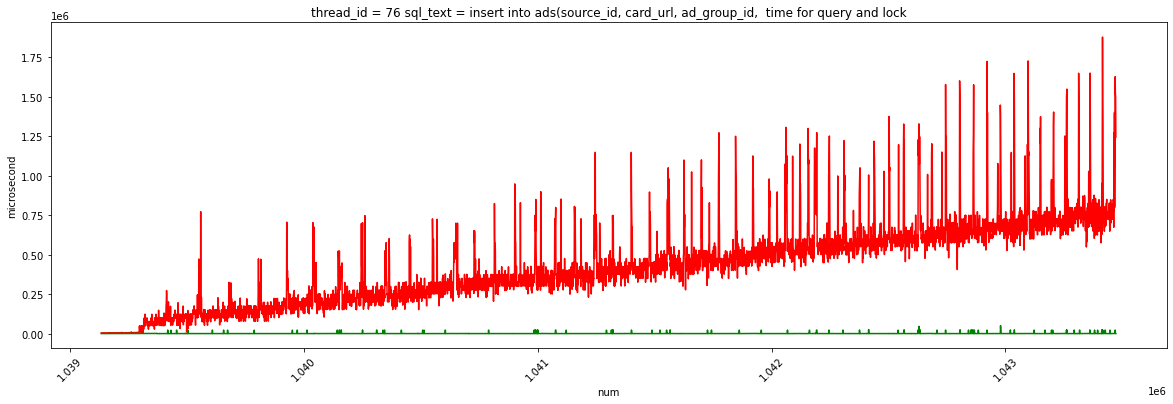
   - hread_id = 81
      - _update ads\n set ad_
      Стоит внмаиельно изучить этот график усеньшев количество итераций
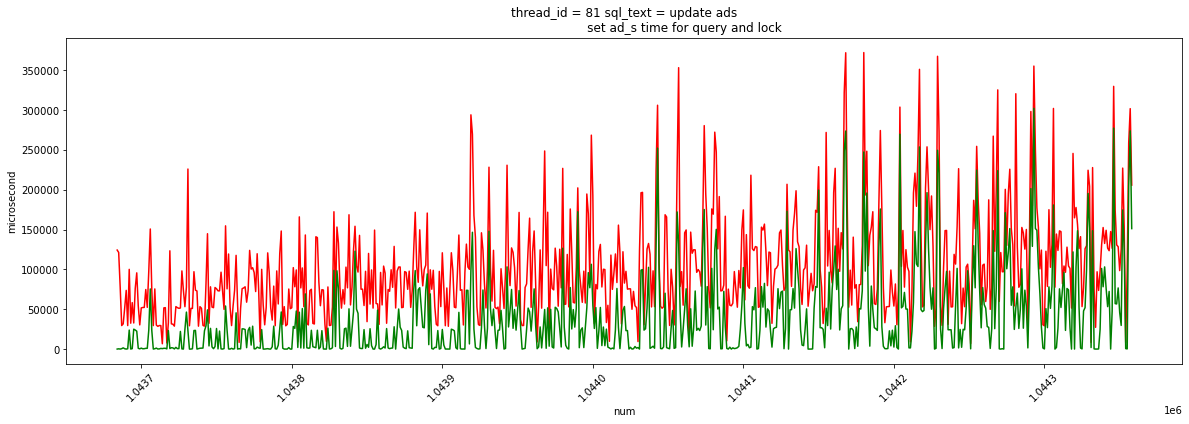
      - _with cte_cars_com_ad_group_ids\n_
      Время выполнения данного квери потоянно увеличивается. Стоит обратить на него внимение
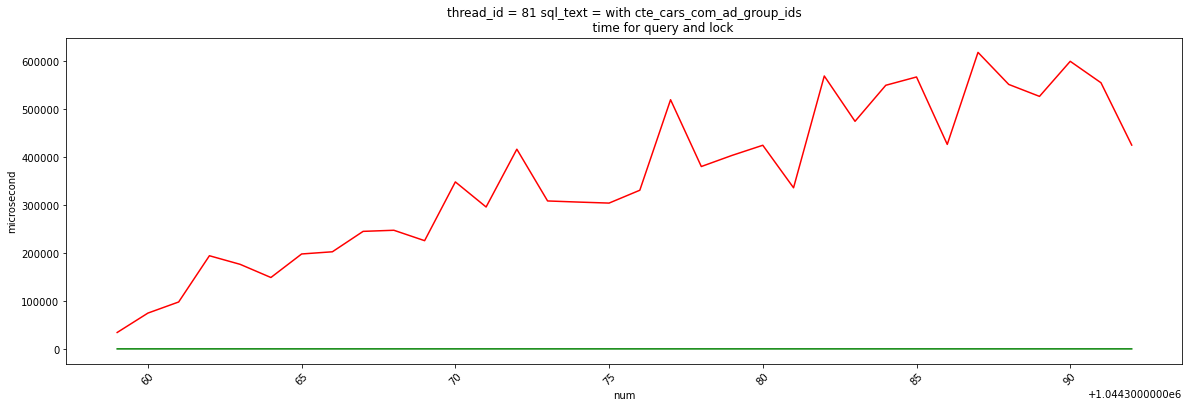
      - _with cte_random_group\n as\n_
      Врем выполнения данного квери потоянно увеличивается. стоит обратить на него внимение
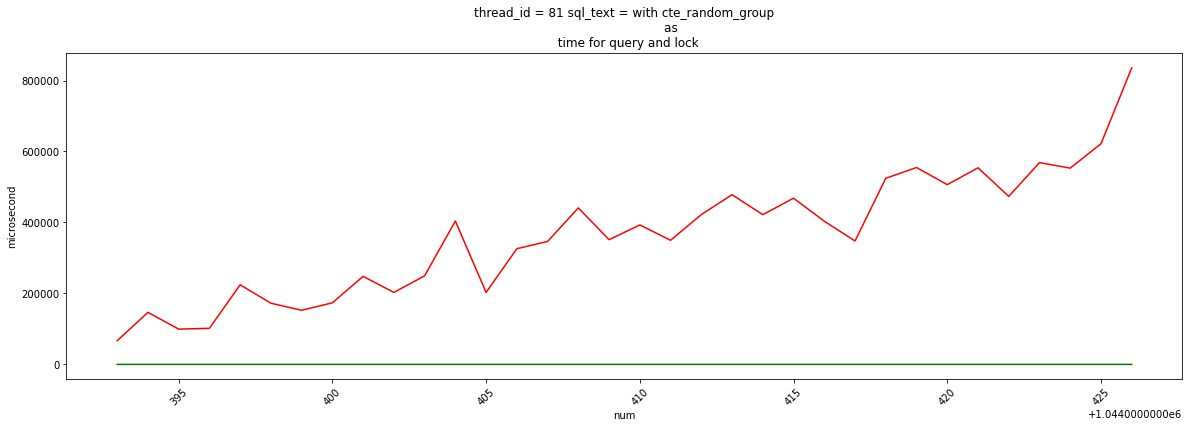

#  Дополнительный анализ _update ads\n set ad _

In [240]:
table_sql_text = summery_table_2[(summery_table_2['thread_id'] == 81) & (summery_table_2['sql_text_true_false'] == 1)][['sql_text']].groupby(by = 'sql_text').count().reset_index()
sql_text = table_sql_text.loc[8, 'sql_text']   
summery_table_for_analisys = summery_table_2[(summery_table_2['sql_text'] == sql_text) & (summery_table_2['thread_id'] == 81)].reset_index()
count_start = 0
coun = 0
count_end = 100
count_final = summery_table_for_analisys.index.max()
summery_table_far_plot = pd.DataFrame(columns = ['start_time', 'all_start_time_MS_diff_avg', 'msec_query_time_avg', 'msec_lock_time_avg', 'msec_all_time_avg'])
while count_start <=count_final:

      index                       user_host                 start_time  \
0     47620  timoti[timoti] @  [172.17.0.1] 2023-06-12 21:17:12.989632   
1     47621  timoti[timoti] @  [172.17.0.1] 2023-06-12 21:17:17.718974   
2     47622  timoti[timoti] @  [172.17.0.1] 2023-06-12 21:17:24.970880   
3     47623  timoti[timoti] @  [172.17.0.1] 2023-06-12 21:17:29.971576   
4     47624  timoti[timoti] @  [172.17.0.1] 2023-06-12 21:17:33.723785   
...     ...                             ...                        ...   
6740  55022  timoti[timoti] @  [172.17.0.1] 2023-06-13 06:15:13.447591   
6741  55023  timoti[timoti] @  [172.17.0.1] 2023-06-13 06:15:19.473450   
6742  55026  timoti[timoti] @  [172.17.0.1] 2023-06-13 06:15:30.462306   
6743  55027  timoti[timoti] @  [172.17.0.1] 2023-06-13 06:15:36.465835   
6744  55028  timoti[timoti] @  [172.17.0.1] 2023-06-13 06:15:39.478886   

                next_start_time  all_start_time_MS_diff  \
0    2023-06-12 21:17:13.475377               472934

In [ ]:
while count_start <=count_final:
    table_for_calculation = summery_table_for_analisys[(summery_table_for_analisys.index >= count_start) & (summery_table_for_analisys.index < count_end)].reset_index()
    all_start_time_MS_diff_avg = table_for_calculation['all_start_time_MS_diff'].mean()
    msec_query_time_avg = table_for_calculation['msec_query_time'].mean()
    msec_lock_time_avg = table_for_calculation['msec_lock_time'].mean()
    msec_all_time_avg = table_for_calculation['msec_all_time'].mean()
    
    if all_start_time_MS_diff_avg: 
        summery_table_far_plot.loc[count,'all_start_time_MS_diff_avg'] = all_start_time_MS_diff_avg
        summery_table_far_plot.loc[count,'msec_query_time_avg'] = msec_query_time_avg
        summery_table_far_plot.loc[count,'msec_lock_time_avg'] = msec_lock_time_avg
        summery_table_far_plot.loc[count,'msec_all_time_avg'] = msec_all_time_avg
        summery_table_far_plot.loc[count,'start_time'] = summery_table_for_analisys.loc[count,'start_time']
        count += 1
    count_start += 100
    count_end +=100

print(f'thread_id = {thread_id} sql_text is {sql_text}')

if len(summery_table_far_plot) > 2:
    fig, ax = plt.subplots()
    ax.plot(summery_table_far_plot['start_time'], summery_table_far_plot['msec_query_time_avg'], color = 'red')
    ax.plot(summery_table_far_plot['start_time'], summery_table_far_plot['msec_lock_time_avg'], color = 'green')
    fig.set_figwidth(20)    #  ширина и
    fig.set_figheight(6)    #  высота "Figure"
    plt.xticks(rotation=45)
    plt.xlabel('num')
    plt.ylabel('microsecond')
    plt.title(f'thread_id = 81 sql_text = {sql_text} time for query and lock')
    plt.show()
    
    fig, ax = plt.subplots()
    ax.plot(summery_table_far_plot['start_time'], summery_table_far_plot['all_start_time_MS_diff_avg'], color = 'blue')
    ax.plot(summery_table_far_plot['start_time'], summery_table_far_plot['msec_all_time_avg'], color = 'red')
    fig.set_figwidth(20)    #  ширина и
    fig.set_figheight(6)    #  высота "Figure"
    plt.xticks(rotation=45)
    plt.xlabel('start_time')
    plt.ylabel('microsecond')
    plt.title(f'thread_id = 81 sql_text = {sql_text} time for all time')
    plt.show()

# Вывод
 Как видем наблюдается линия роста времени выполнения квери, что также требует решений по его оптимизации
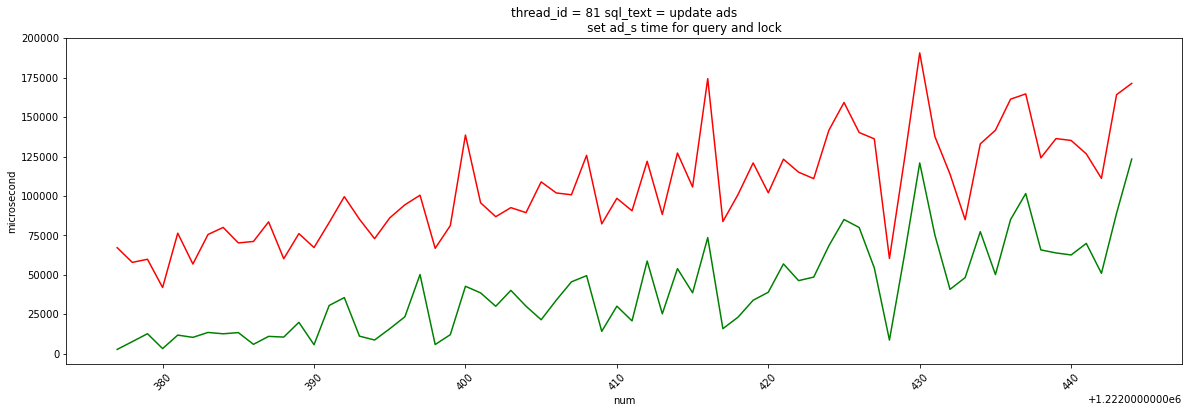

# Анализ данных из файла cards_finder_cars_com_log

In [175]:
cards_finder_cars_com_log = pd.DataFrame(columns = ['time', 'num'])
f = open("cards_finder_cars_com_log.json", "r")
count = 1
for row in f:
    if row[7:14] != '':
        cards_finder_cars_com_log.loc[count, 'time'] = row[7:14]
        cards_finder_cars_com_log.loc[count, 'num'] = count
        cards_finder_cars_com_log.loc[count-1, 'nex_time'] = row[7:14]
        count += 1
cards_finder_cars_com_log = cards_finder_cars_com_log[(cards_finder_cars_com_log.index > 0) & (cards_finder_cars_com_log.index < 4960)]
cards_finder_cars_com_log['nex_time'] = cards_finder_cars_com_log['nex_time'].astype('datetime64') 
cards_finder_cars_com_log['time'] = cards_finder_cars_com_log['time'].astype('datetime64')

cards_finder_cars_com_log['interval_ts1'] = ((cards_finder_cars_com_log['nex_time'] - cards_finder_cars_com_log['time']).astype(np.int64) / 10**6).astype(int)

C:\Users\SERGEY~1\AppData\Local\Temp/ipykernel_33412/1872098858.py:14: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  cards_finder_cars_com_log['interval_ts1'] = ((cards_finder_cars_com_log['nex_time'] - cards_finder_cars_com_log['time']).astype(np.int64) / 10**6).astype(int)


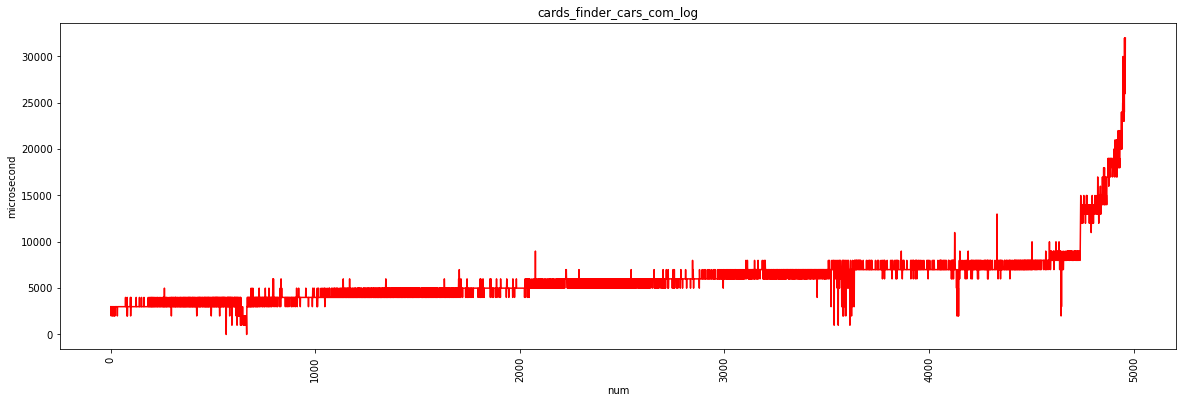

In [176]:
fig, ax = plt.subplots()
ax.plot(cards_finder_cars_com_log['num'], cards_finder_cars_com_log['interval_ts1'], color = 'red')
fig.set_figwidth(20)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
plt.xticks(rotation='vertical')
plt.xlabel('num')
plt.ylabel('microsecond')
plt.title('cards_finder_cars_com_log')
plt.show()

# Вывод 
Как видем растет время работы finder, но график получается сложно читаемым. 
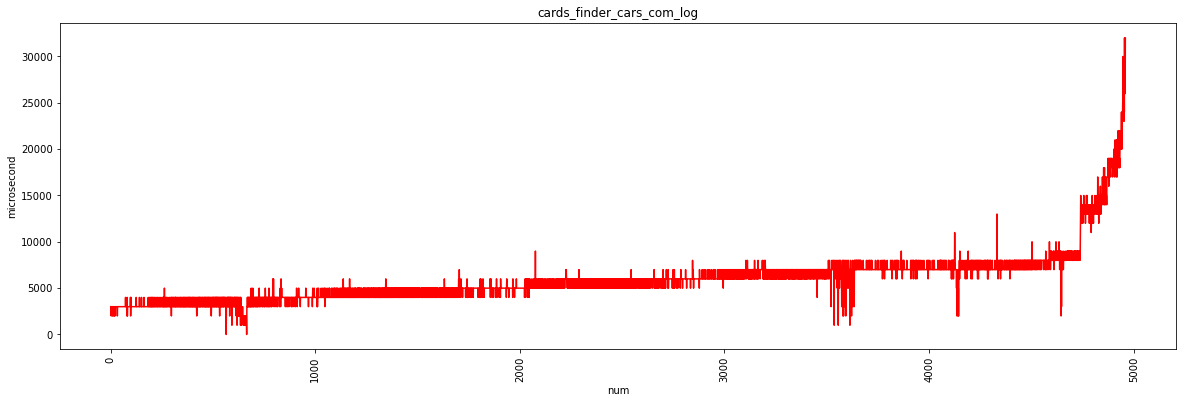
#### Для того что бы улучшить его сгладим данные.


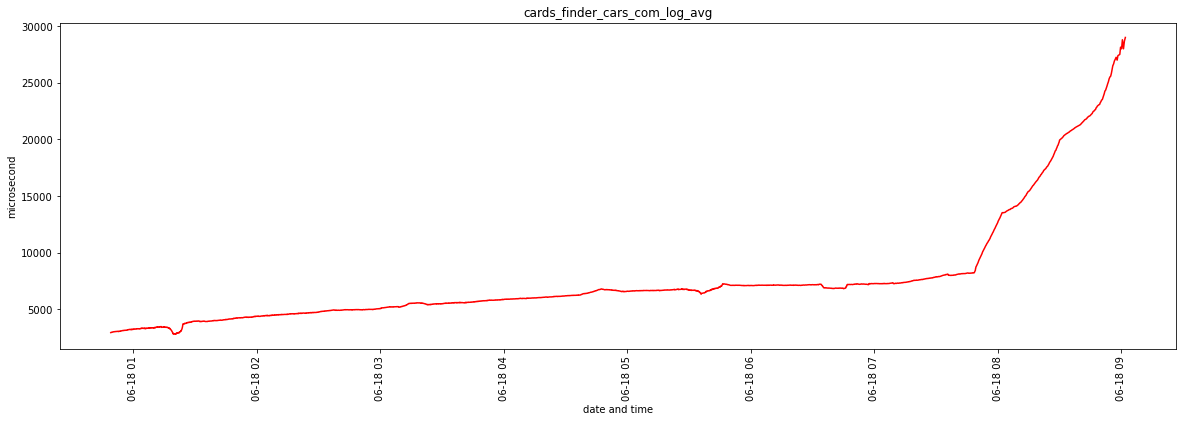

In [208]:
cards_finder_cars_com_log_avg = pd.DataFrame(columns = ['time', 'interval_ts1'])
count_start = 1
count_end = 100
count_index = 0
while count_start < 4959:
    avg_time = cards_finder_cars_com_log[(cards_finder_cars_com_log['num'] >= count_start) & (cards_finder_cars_com_log['num'] < count_end)]['interval_ts1'].mean()
    cards_finder_cars_com_log_avg.loc[count_index,'time'] = cards_finder_cars_com_log.loc[count_start, 'time']
    cards_finder_cars_com_log_avg.loc[count_index,'interval_ts1'] = avg_time
    count_end += 1
    count_start += 1
    count_index += 1
    
cards_finder_cars_com_log_avg = cards_finder_cars_com_log_avg[cards_finder_cars_com_log_avg['interval_ts1'] != 0]

fig, ax = plt.subplots()
ax.plot(cards_finder_cars_com_log_avg['time'], cards_finder_cars_com_log_avg['interval_ts1'], color = 'red')
fig.set_figwidth(20)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
plt.xticks(rotation='vertical')
plt.xlabel('date and time')
plt.ylabel('microsecond')
plt.title('cards_finder_cars_com_log_avg')
plt.show()

# Вывод 

Как итог Мы видем значительное увелечение времени работы finder

# Анализ работы 1 скрапера

C:\Users\SERGEY~1\AppData\Local\Temp/ipykernel_33412/2507690849.py:15: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  cards_scrapper_cars_com_1_log['interval_ts1'] = ((cards_scrapper_cars_com_1_log['nex_time'] - cards_scrapper_cars_com_1_log['time']).astype(np.int64) / 10**6).astype(int)


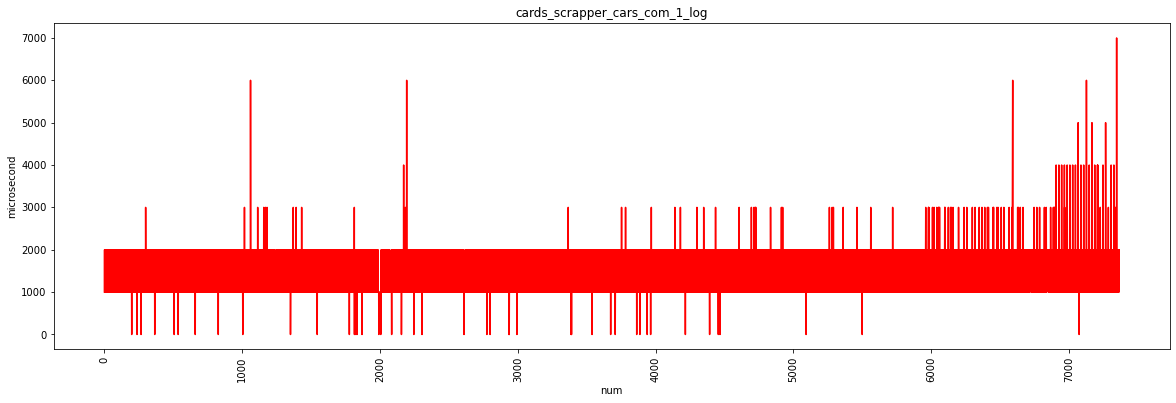

In [180]:
cards_scrapper_cars_com_1_log = pd.DataFrame(columns = ['time', 'num', 'nex_time'])
f = open("cards_scrapper_cars_com_1_log.txt", "r")
count = 1
for row in f:
    if row[0:8] != '':
        cards_scrapper_cars_com_1_log.loc[count, 'time'] = row[0:8]
        cards_scrapper_cars_com_1_log.loc[count, 'num'] = count
        cards_scrapper_cars_com_1_log.loc[count-1, 'nex_time'] = row[0:8]
        count += 1
        
cards_scrapper_cars_com_1_log = cards_scrapper_cars_com_1_log[(cards_scrapper_cars_com_1_log.index > 0) & (cards_scrapper_cars_com_1_log.index < 7363)]
cards_scrapper_cars_com_1_log['nex_time'] = cards_scrapper_cars_com_1_log['nex_time'].astype('datetime64') 
cards_scrapper_cars_com_1_log['time'] = cards_scrapper_cars_com_1_log['time'].astype('datetime64')

cards_scrapper_cars_com_1_log['interval_ts1'] = ((cards_scrapper_cars_com_1_log['nex_time'] - cards_scrapper_cars_com_1_log['time']).astype(np.int64) / 10**6).astype(int)

fig, ax = plt.subplots()
ax.plot(cards_scrapper_cars_com_1_log['num'], cards_scrapper_cars_com_1_log['interval_ts1'], color = 'red')
fig.set_figwidth(20)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
plt.xticks(rotation='vertical')
plt.xlabel('num')
plt.ylabel('microsecond')
plt.title('cards_scrapper_cars_com_1_log')
plt.show()

#### Как видим график не информативный, сгладим его как в предыдущем случае. 

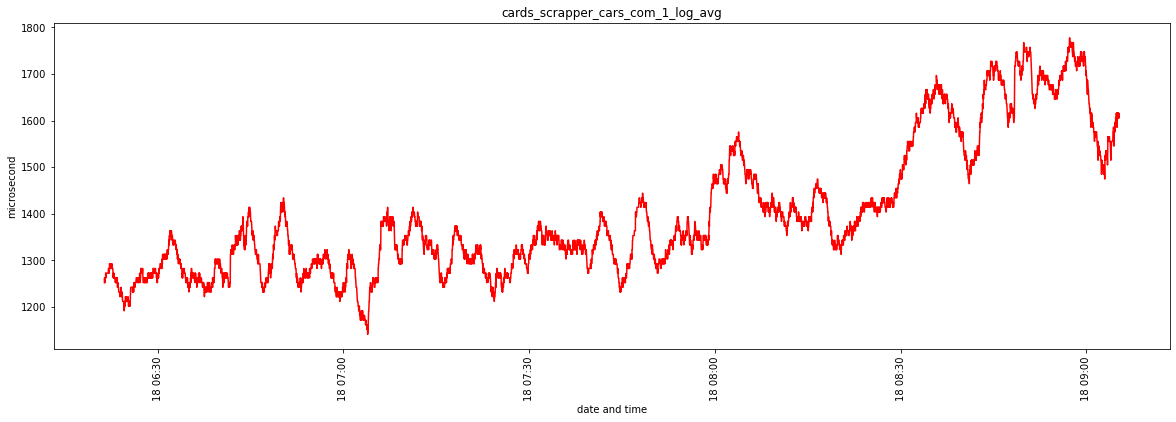

In [195]:
cards_scrapper_cars_com_1_log_avg = pd.DataFrame(columns = ['time', 'interval_ts1'])
count_start = 1
count_end = 100
count_index = 0
while count_end < 7200:
    avg_time = cards_scrapper_cars_com_1_log[(cards_scrapper_cars_com_1_log['num'] >= count_start) & (cards_scrapper_cars_com_1_log['num'] < count_end)]['interval_ts1'].mean()
    cards_scrapper_cars_com_1_log_avg.loc[count_index,'time'] = cards_scrapper_cars_com_1_log.loc[count_start, 'time']
    cards_scrapper_cars_com_1_log_avg.loc[count_index,'interval_ts1'] = avg_time
    count_end += 1
    count_start += 1
    count_index += 1
    
cards_scrapper_cars_com_1_log_avg = cards_scrapper_cars_com_1_log_avg[cards_scrapper_cars_com_1_log_avg['time'] != 0]

fig, ax = plt.subplots()
ax.plot(cards_scrapper_cars_com_1_log_avg['time'], cards_scrapper_cars_com_1_log_avg['interval_ts1'], color = 'red')
fig.set_figwidth(20)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
plt.xticks(rotation='vertical')
plt.xlabel('date and time')
plt.ylabel('microsecond')
plt.title('cards_scrapper_cars_com_1_log_avg')
plt.show()

# Анализ работы 2 скрапера

C:\Users\SERGEY~1\AppData\Local\Temp/ipykernel_33412/3328017293.py:15: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  cards_scrapper_cars_com_2_log['interval_ts1'] = ((cards_scrapper_cars_com_2_log['nex_time'] - cards_scrapper_cars_com_2_log['time']).astype(np.int64) / 10**6).astype(int)


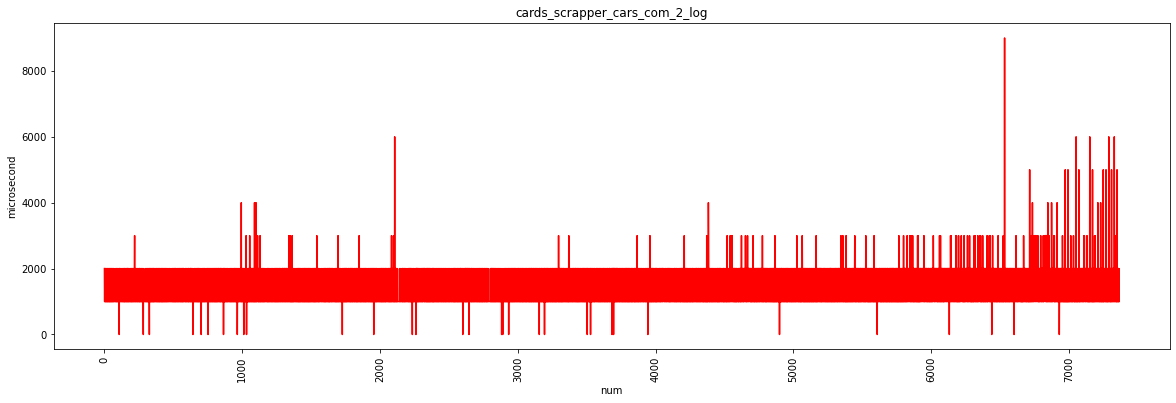

In [183]:
cards_scrapper_cars_com_2_log = pd.DataFrame(columns = ['time', 'num', 'nex_time'])
f = open("cards_scrapper_cars_com_2_log.txt", "r")
count = 1
for row in f:
    if row[0:8] != '':
        cards_scrapper_cars_com_2_log.loc[count, 'time'] = row[0:8]
        cards_scrapper_cars_com_2_log.loc[count, 'num'] = count
        cards_scrapper_cars_com_2_log.loc[count-1, 'nex_time'] = row[0:8]
        count += 1
        
cards_scrapper_cars_com_2_log = cards_scrapper_cars_com_2_log[(cards_scrapper_cars_com_2_log.index > 0) & (cards_scrapper_cars_com_2_log.index < 7363)]
cards_scrapper_cars_com_2_log['nex_time'] = cards_scrapper_cars_com_2_log['nex_time'].astype('datetime64') 
cards_scrapper_cars_com_2_log['time'] = cards_scrapper_cars_com_2_log['time'].astype('datetime64')

cards_scrapper_cars_com_2_log['interval_ts1'] = ((cards_scrapper_cars_com_2_log['nex_time'] - cards_scrapper_cars_com_2_log['time']).astype(np.int64) / 10**6).astype(int)

fig, ax = plt.subplots()
ax.plot(cards_scrapper_cars_com_2_log['num'], cards_scrapper_cars_com_2_log['interval_ts1'], color = 'red')
fig.set_figwidth(20)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
plt.xticks(rotation='vertical')
plt.xlabel('time')
plt.ylabel('microsecond')
plt.title('cards_scrapper_cars_com_2_log')
plt.show()

# Вывод 
график не четаемый. Требуется дополнительная доработка. Сгладим график и посмотрим а результат. 

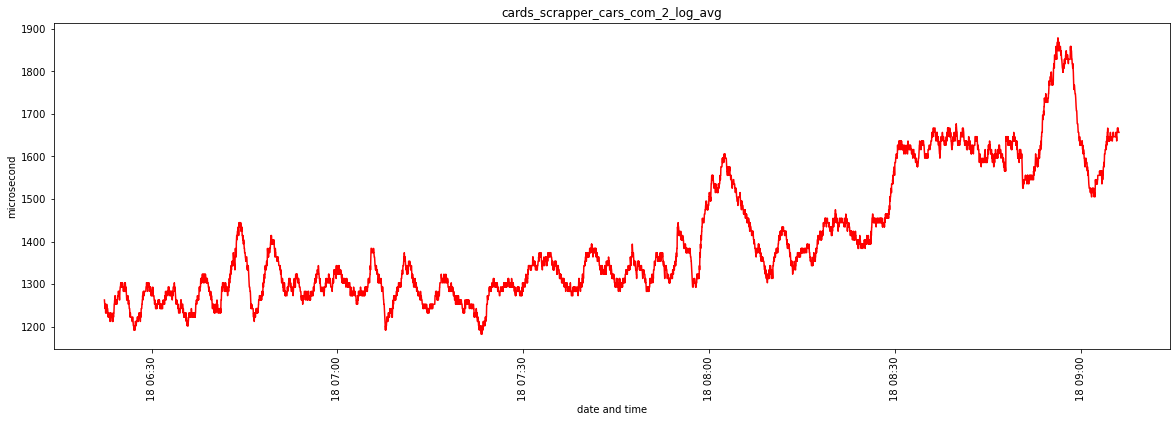

In [194]:
cards_scrapper_cars_com_2_log_avg = pd.DataFrame(columns = ['time', 'interval_ts1'])
count_start = 1
count_end = 100
count_index = 0
while count_end < 7200:
    avg_time = cards_scrapper_cars_com_2_log[(cards_scrapper_cars_com_2_log['num'] >= count_start) & (cards_scrapper_cars_com_2_log['num'] < count_end)]['interval_ts1'].mean()
    cards_scrapper_cars_com_2_log_avg.loc[count_index,'time'] = cards_scrapper_cars_com_2_log.loc[count_start, 'time']
    cards_scrapper_cars_com_2_log_avg.loc[count_index,'interval_ts1'] = avg_time
    count_end += 1
    count_start += 1
    count_index += 1
    
cards_scrapper_cars_com_2_log_avg = cards_scrapper_cars_com_2_log_avg[cards_scrapper_cars_com_2_log_avg['time'] != 0]

fig, ax = plt.subplots()
ax.plot(cards_scrapper_cars_com_2_log_avg['time'], cards_scrapper_cars_com_2_log_avg['interval_ts1'], color = 'red')
fig.set_figwidth(20)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
plt.xticks(rotation='vertical')
plt.xlabel('date and time')
plt.ylabel('microsecond')
plt.title('cards_scrapper_cars_com_2_log_avg')
plt.show()

# Вывод 
   1. Происходит замедление работы файндера и 2-х скраперов:
   
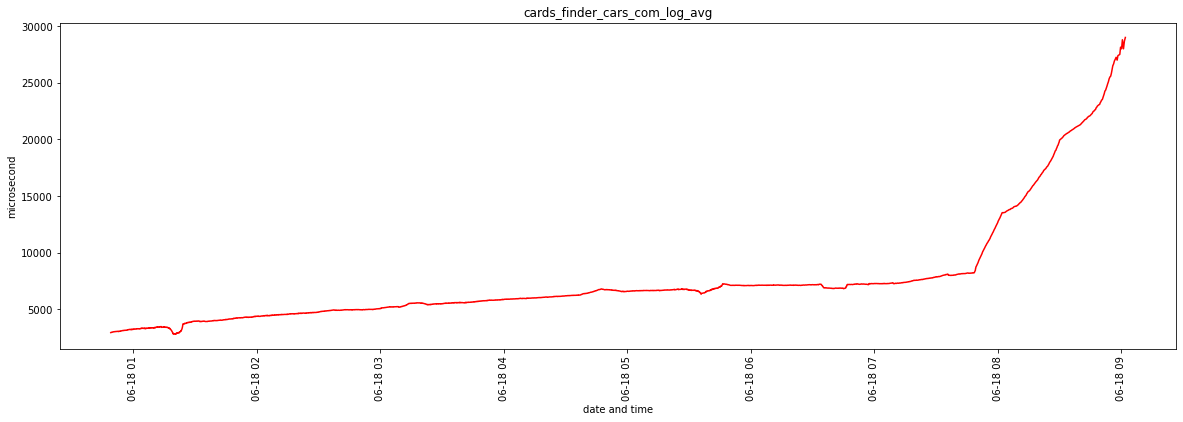

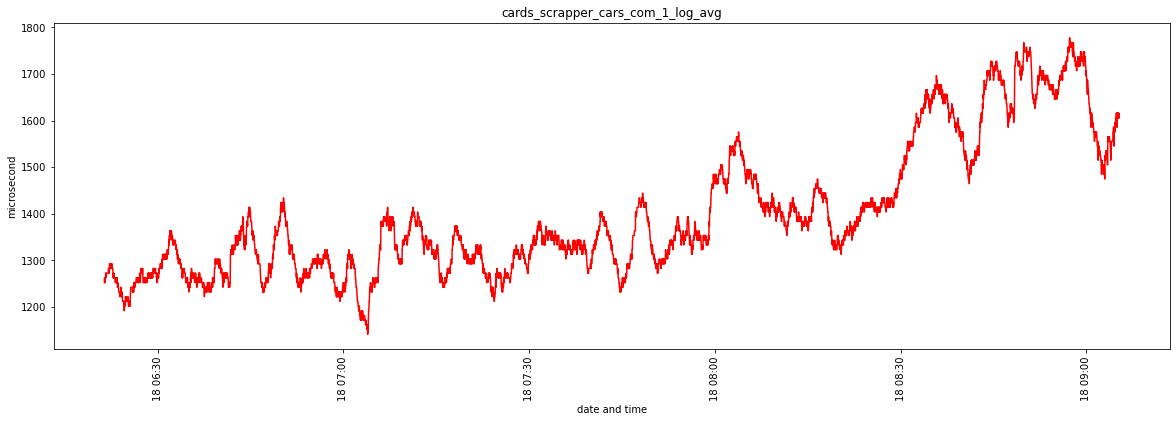

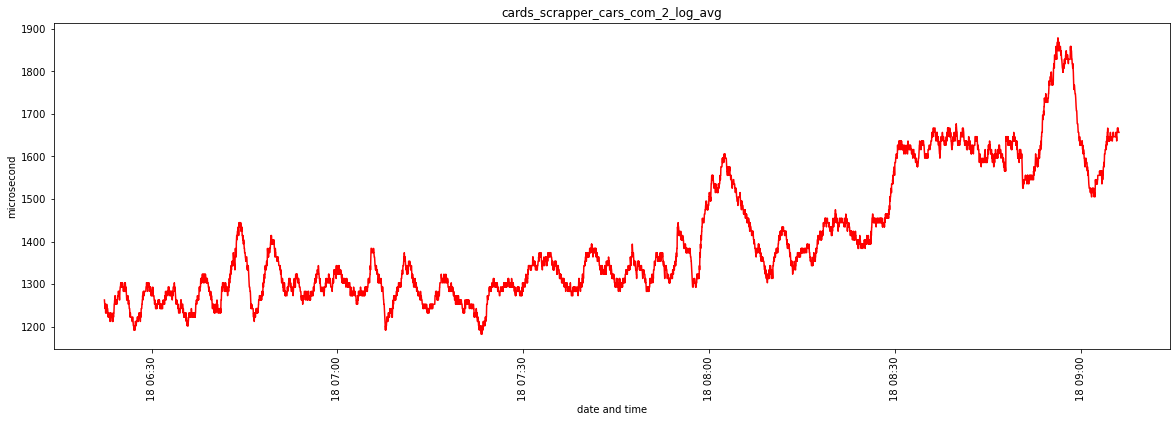

  2. При анализе работы файндера выявлены следующие запросы которые замедляются:
  - _insert into ad_groups(group_url, process_log_id) v_
      
      
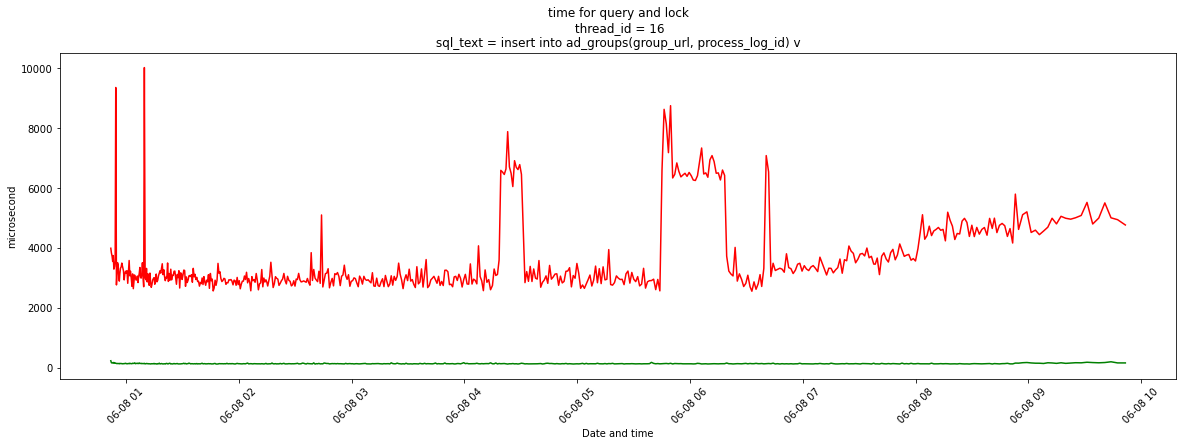
      
  - _insert into ads(source_id, card_url, ad_group_id_

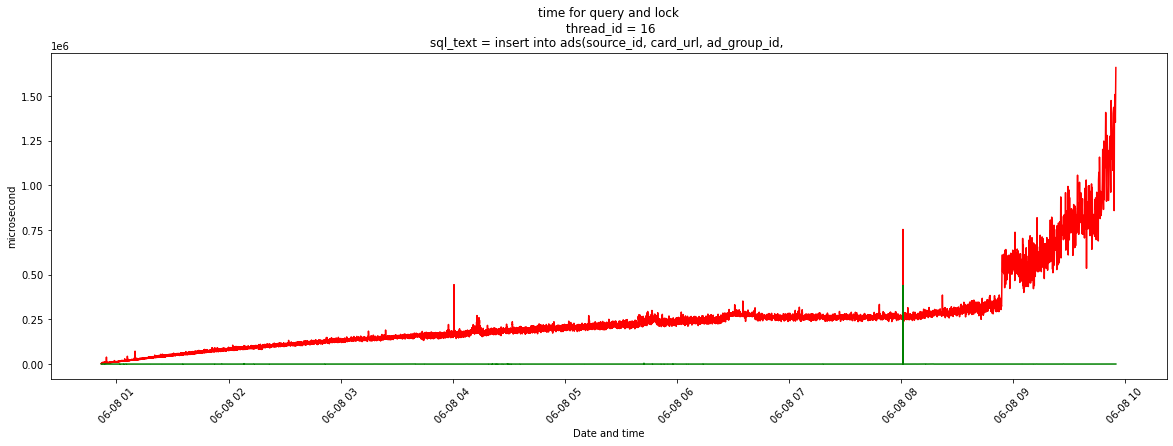      

   3. При анализе работы скраперв, выявлены следующие запросы, время выполнения которых увеличивается:
   
   - _update ads\n set ad_s_


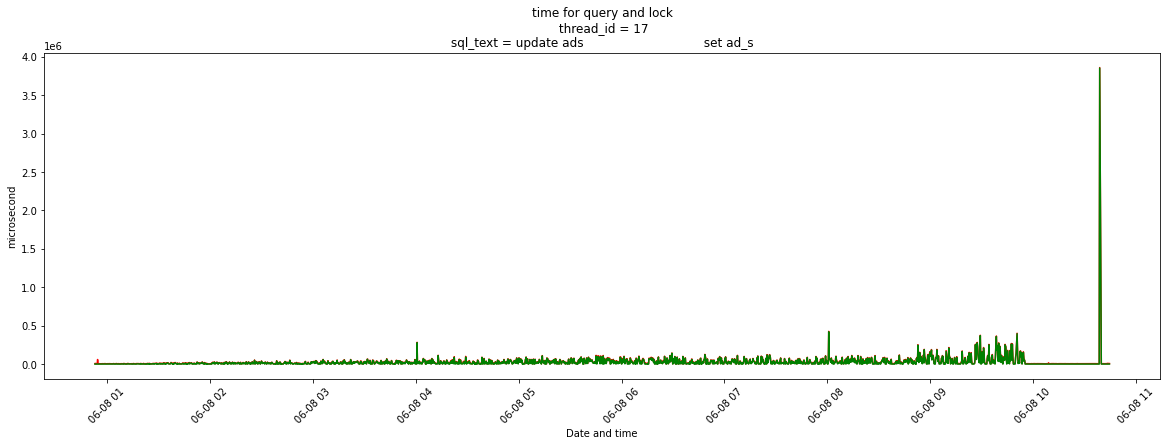
 
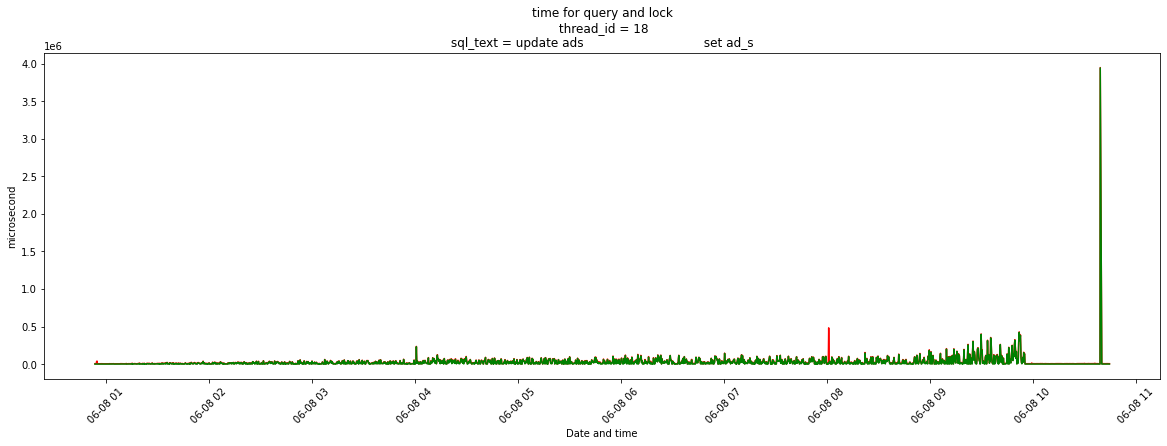
 
   - _with cte_cars_com_ad_group_ids\n_

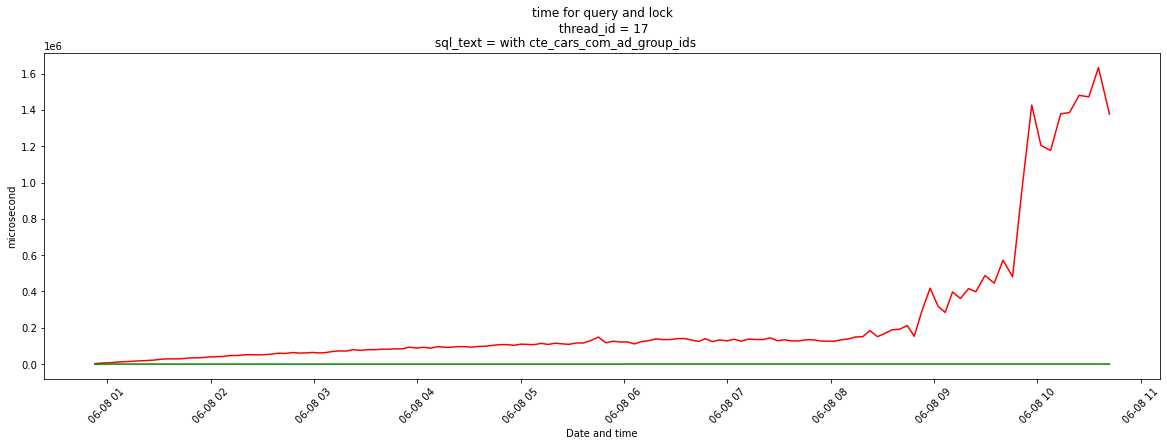

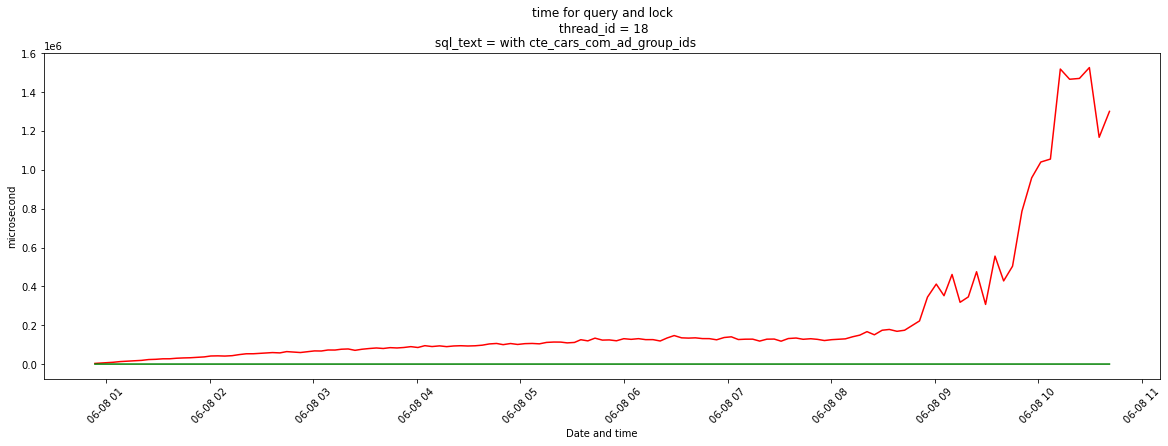


   - _with cte_random_group\n as\n_
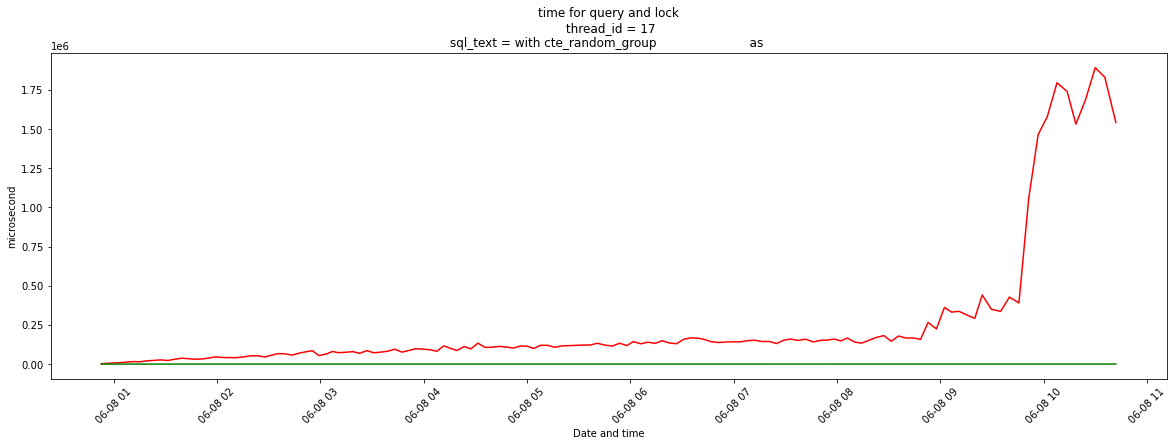

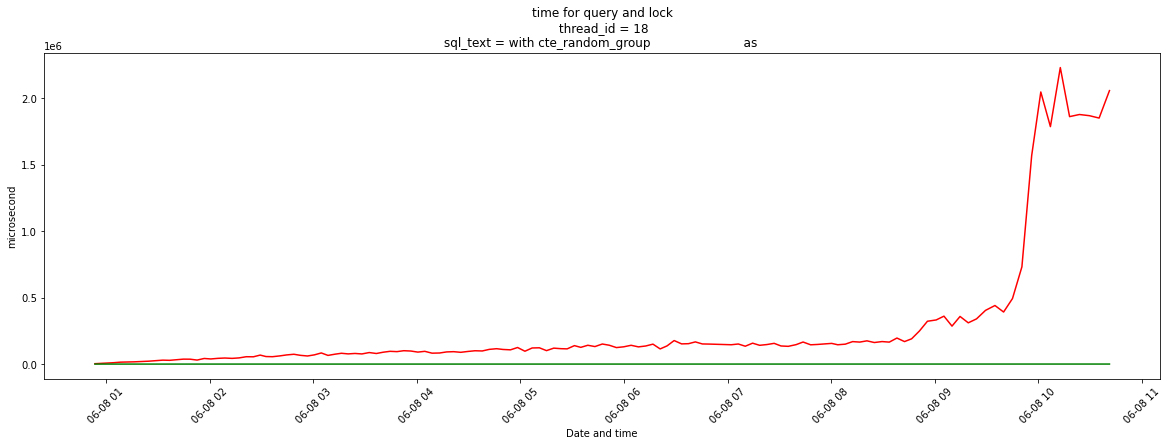

   #### 3. Во время работы файндера и скрапера на машинах с более слабым аппаратным обеспечением мы наблюдаем те же тенденции, 
   - _insert into ads(source_id, card_url, ad_group_id_
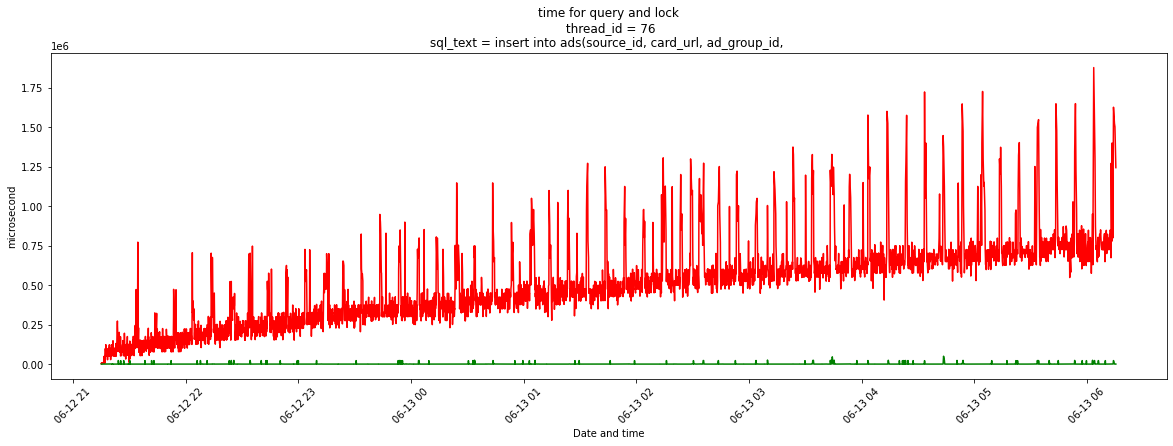
   - _update ads\n set ad_
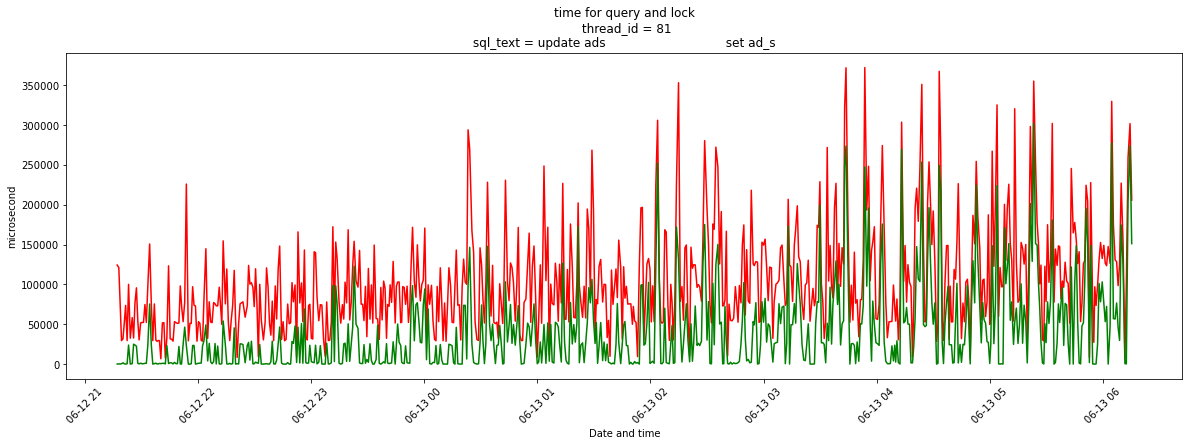
   - _with cte_cars_com_ad_group_ids\n_
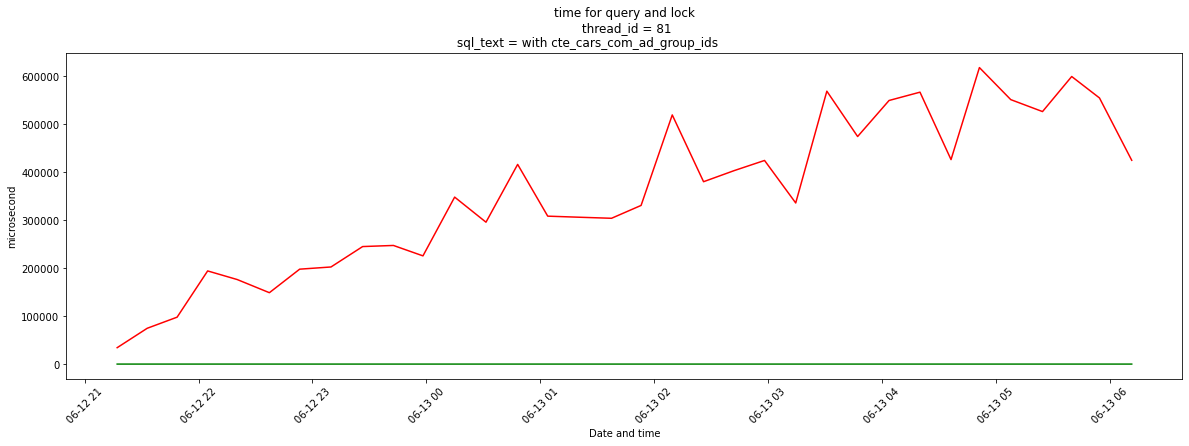
   - _with cte_random_group\n as\n_
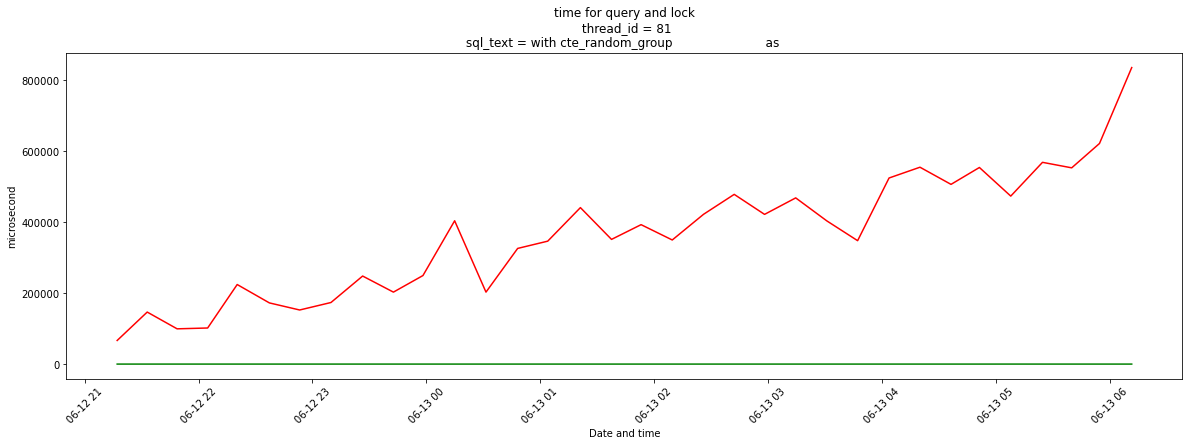